# 목표 : 고객의 이탈을 방지하고 관리할 수 있는 방안을 수립
- 최근 3개월 동안 [구매확정]된 결제금액을 기준으로 매월 1일 결제금액별 등급 혜택을 지급하는 제도이며, 총 6개의 등급(브론즈/실버/골드/플래티넘/다이아몬드/스타)으로 운영
# 이탈 고객 정의
- - 생필품 쇼핑몰인 특성상, 3개월 미구매시 휴먼 전환으로 판단됨 
- 따라서 
    - 최근 3개월간 구매 없음 → 휴면 예비군
    - 최근 6개월간 구매 없음 → 휴면 고객
    - 1년 이상 미구매 → 이탈 간주
# 고객 등급 정의
- 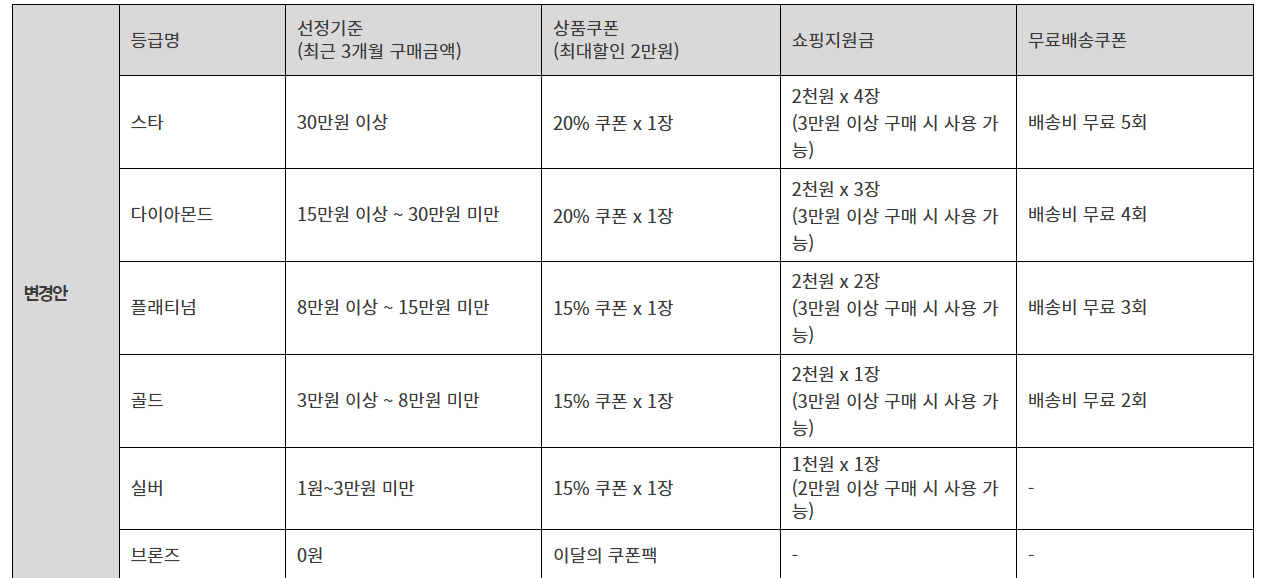
- https://www.momq.co.kr/m/board.html?code=2020nemomq_board5&page=1&type=v&board_cate=&num1=999251&num2=00000&s_id=&stext=%B5%EE%B1%DE&ssubject=&shname=&scontent=&search_type=subject&number=4&lock=N

In [41]:
# 1. 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('전처리완료.csv', encoding='CP949')

# 물품대분류별 상위 10개 상품명과 구매수 출력
top10_by_category = (
    df.groupby('물품대분류')['상품명_정제']
      .value_counts()
      .groupby(level=0)
      .head(10)
      .reset_index(name='구매수')
)

top10_by_category

,물품대분류,상품명_정제,구매수
0,FC,팬티라이너 유기농 순면 롱,572
1,FC,입는 오버나이트 대형,458
2,FC,유기농 순면 뉴 울트라 날개 중형,375
3,FC,유기농 순면 뉴 수퍼롱 오버나이트,328
4,FC,좋은 순면 팬티라이너 롱,321
5,FC,순수 팬티라이너 롱,286
6,FC,유기농 순면 뉴 오버나이트,263
7,FC,유기농 순면 뉴 울트라 날개 대형,260
8,FC,입는 오버나이트 중형,240
9,FC,솜솜 수퍼롱 오버나이트,225


In [1]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('./kids_data/전처리된_df.csv')

df.shape

(209593, 28)

In [22]:
bold = '\033[1m'
end = '\033[0m'
tab = df.copy()
tab['연도'] = df['구매일'].str.split('-').str[0]
tab = tab[tab['연도'] == '2022']

hug = df[df['상품명'].str.contains('허그박스', na=False)].shape[0] 

print(f'{bold}2022년 매출 :{end} {tab['결제금액'].sum()} 원')
print(f'전체 데이터 중 허그박스 주문 건수 비율 : {bold}{hug / df.shape[0]* 100:.2f}%{end}로 {bold}{hug}{end}건 입니다.')

2022년 매출 : 3128951607.0 원
전체 데이터 중 허그박스 주문 건수 비율 : 5.73%로 12016건 입니다.


In [6]:
# 2. 전처리
mask = df['상품명'].str.contains('물티슈', na=False)
df.loc[mask, '물품대분류'] = '물티슈'
mask = df['상품명'].str.contains('더블하트', na=False)
df.loc[mask, '물품대분류'] = '기타'
mask = df['상품명'].str.contains('[핑크퐁]', na=False)
df.loc[mask, '물품대분류'] = '기타'
mask = df['상품명'].str.contains('젖병 깔끔 세척 끝! 세트', na=False)
df.loc[mask, '물품대분류'] = '기타'
mask = df['상품명'].str.contains('이유식기 준비 끝! 세트', na=False)
df.loc[mask, '물품대분류'] = '기타'
mask = df['상품명'].str.contains('안심 위생 관리 세트', na=False)
df.loc[mask, '물품대분류'] = '기타'
mask = df['상품명'].str.contains('레드투래드', na=False)
df.loc[mask, '물품대분류'] = 'SKC'

df = df[df['결제금액'] != -35166]

# 우태 코드

df.loc[df['구매시월령'].notna() & (df['자녀여부'] == 'No'), '자녀여부'] = 'Yes'


# 2. 결측치 처리 및 상품명 재정제
df = df.dropna(subset=['상품명']) # 4건 결측치 발생 -> 삭제
df = df.dropna(subset=['구매시월령'])
import re

def clean_product_name(name):
    if not isinstance(name, str):
        return ''

    # 1. 불용어 제거
    name = re.sub(r'\b팬티형\b|\b밴드형\b|\b기저귀\b|\b팬티\b', '', name)

    # 2. 특수문자 제거
    name = re.sub(r'[^가-힣a-zA-Z0-9 ]', '', name)

    # 3. 공백 정리
    name = re.sub(r'\s+', ' ', name).strip()

    # 4. 중복 단어 제거 (단어 순서 유지)
    words = name.split()
    seen = set()
    deduped = [w for w in words if not (w in seen or seen.add(w))]

    return ' '.join(deduped)

# 적용
df['상품명_정제'] = df['상품명'].apply(clean_product_name)

df['상품명_정제'].nunique()


# 3. 데이터 타입 변경
for dt_col in '배송완료일 배송시작일 구매일'.split(): 
    df[dt_col] = pd.to_datetime(df[dt_col])

df['주문번호'] = df['주문번호'].astype(object)
df['고객번호'] = df['고객번호'].astype(object)

for cat_col in ['물품대분류','상품명','결혼유무','거주지역','결제등록카드','유입경로','자녀여부','기저귀단계','택배이동기간','주문일로부터배송완료시간','남아여아공용','브랜드','구매시월령_bin','상품명_정제']:
    df[cat_col] = pd.Categorical(df[cat_col])

df['결혼유무']= np.where(df['결혼유무']=='미혼',0,1)

# 1. 고객별 총 주문 수 계산
order_count = df.groupby('고객번호')['주문번호'].size().reset_index(name='총주문횟수')
last_orderday = df.groupby('고객번호')['구매일'].max()
# 2. 원본 데이터와 병합
df = df.merge(order_count, on='고객번호', how='left')
df = df.merge(last_orderday, on='고객번호', how='left')

df['결제등록카드'] = df['결제등록카드'].replace('국민카드', '국민은행').replace('신한카드', '신한은행').replace('외환은행', '하나은행')

df.columns = ['주문번호', '배송완료일', '배송시작일', '구매일', '구매시월령', '고객번호', '구매금액', '결제금액',
       '물품대분류', '상품명', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부',
       '물품판매량', '제품단가', '주문일로부터배송완료시간', '택배이동기간', '기저귀단계', '남아여아공용', '브랜드',
       '원플원', '핫딜', '아이정보건너뛰기', '구매시월령_bin', '상품명_정제', '총주문횟수', '마지막구매일']

df['고객휴면일수'] = (df['배송완료일'].max()-df['마지막구매일']).dt.days



# 등급 부여 함수
def 등급부여(금액):
    if 금액 >= 300000:
        return '스타'
    elif 금액 >= 150000:
        return '다이아몬드'
    elif 금액 >= 80000:
        return '플래티넘'
    elif 금액 >= 30000:
        return '골드'
    elif 금액 >= 1:
        return '실버'
    else:
        return '브론즈'

# 1) 고객별 마지막 주문일 계산
last_order = df.groupby('고객번호')['구매일'] \
               .max() \
               .reset_index(name='최종구매일')
# 2) 원본 df에 붙이기
df2 = df.merge(last_order, on='고객번호', how='left')

# 3) "3개월 이내" 여부 플래그
df2['최근3개월'] = df2['구매일'] >= df2['최종구매일'] - pd.DateOffset(months=3)

# 4) 고객별 최근 3개월 합산
고객별_3개월합 = (
    df2[df2['최근3개월']]
    .groupby('고객번호')['결제금액']
    .sum()
    .reset_index(name='최근3개월구매금액')
)

# 5) 원본 df에 합산 결과 병합
df = df.merge(고객별_3개월합, on='고객번호', how='left')

df['고객등급']=df['최근3개월구매금액'].apply(lambda x : 등급부여(x))

# 고객 등급에 따른 혜택 컬럼 생성
df['등급별혜택_상품쿠폰'] = np.where(df['고객등급']=='스타','20%쿠폰1장',
         np.where(df['고객등급']=='다이아몬드','20%쿠폰1장',
                  np.where(df['고객등급']=='플래티넘','15%쿠폰1장',
                           np.where(df['고객등급']=='골드','15%쿠폰1장',
                                    np.where(df['고객등급']=='실버','15%쿠폰1장',
                                             np.where(df['고객등급']=='브론즈','이달의쿠폰팩',np.nan))))))

df['등급별혜택_쇼핑지원금'] = np.where(df['고객등급']=='스타','2천원 4장',
         np.where(df['고객등급']=='다이아몬드','2천원 3장',
                  np.where(df['고객등급']=='플래티넘','2천원 2징',
                           np.where(df['고객등급']=='골드','2천원 1장',
                                    np.where(df['고객등급']=='실버','1천원 1장',
                                             np.where(df['고객등급']=='브론즈','X',np.nan))))))

df['등급별혜택_무료배송쿠폰'] = np.where(df['고객등급']=='스타','배송비 무료 5회',
         np.where(df['고객등급']=='다이아몬드','배송비 무료 4회',
                  np.where(df['고객등급']=='플래티넘','배송비 무료 3회',
                           np.where(df['고객등급']=='골드','배송비 무료 2회',
                                    np.where(df['고객등급']=='실버','X',
                                             np.where(df['고객등급']=='브론즈','X',np.nan))))))

df['거주지역'] = df['거주지역'].replace({'강원':'강원','경기':'경기','경남':'경상도','경북':'경상도','광주':'광주'
                  ,'대구':'대구','대전':'대전','부산':'부산','서울':'서울','인천':'인천'
                   ,'전남':'전라도','전북':'전라도','제주':'제주','충남':'충청도','충북':'충청도'
                })

# 이탈 등급
# 마지막 구매 1년 이상 -> 이탈
# 6개월 ~ 1년 -> 휴면 고객
# 3개월 ~ 6개월 -> 휴면예비군
# ~ 3개월 -> 활성화고객
df['이탈등급'] = np.where(df['고객휴면일수']>30*12, '이탈'
         ,np.where(df['고객휴면일수']>30*6, '휴면 고객'
                   ,np.where(df['고객휴면일수']>30*3, '휴면예비군','활성화고객')))

In [244]:
df.dtypes

주문번호                    object
배송완료일           datetime64[ns]
배송시작일           datetime64[ns]
구매일             datetime64[ns]
구매시월령                  float64
고객번호                    object
구매금액                   float64
결제금액                   float64
물품대분류                 category
상품명                   category
성별                      object
결혼유무                     int32
거주지역                  category
연령                     float64
결제등록카드                category
유입경로                  category
자녀여부                  category
물품판매량                    int64
제품단가                     int64
주문일로부터배송완료시간          category
택배이동기간                category
기저귀단계                 category
남아여아공용                category
브랜드                   category
원플원                      int64
핫딜                       int64
아이정보건너뛰기                 int64
구매시월령_bin             category
상품명_정제                category
총주문횟수                    int64
마지막구매일          datetime64[ns]
고객휴면일수                   int64
최근3개월구매금

In [245]:
df.isna().sum()

주문번호                0
배송완료일               0
배송시작일               0
구매일                 0
구매시월령               0
고객번호                0
구매금액                0
결제금액                0
물품대분류               0
상품명                 0
성별                  0
결혼유무                0
거주지역                0
연령                  0
결제등록카드              0
유입경로                0
자녀여부                0
물품판매량               0
제품단가                0
주문일로부터배송완료시간        0
택배이동기간              0
기저귀단계           90529
남아여아공용          89286
브랜드                 0
원플원                 0
핫딜                  0
아이정보건너뛰기            0
구매시월령_bin           0
상품명_정제              0
총주문횟수               0
마지막구매일              0
고객휴면일수              0
최근3개월구매금액           0
고객등급                0
등급별혜택_상품쿠폰          0
등급별혜택_쇼핑지원금         0
등급별혜택_무료배송쿠폰        0
이탈등급                0
dtype: int64

In [199]:
df['고객등급']. value_counts()

고객등급
실버       75862
골드       56956
플래티넘     31971
다이아몬드    14702
스타        4075
브론즈       1784
Name: count, dtype: int64

In [200]:
df['이탈등급'].value_counts()

이탈등급
활성화고객    59894
휴면 고객    52393
휴면예비군    39289
이탈       33774
Name: count, dtype: int64

# 이탈고객에 영향을 주는 가설 EDA 기반
    - 물품대분류가 일상적이지 않을 것이다.
    - 미혼이 많을 것이다.
    - 거주지역은 로켓배송이 안 되는 지역일 것이다.
    - 자녀가 없는 사람의 이탈이 클 것이다.
    - 배송에 걸린 시간이 그렇지 않은 고객보다 클 것이다.
    - 택배이동기간이 더 길 것이다. -> 택배가 시작했으니 취소하지도 못하고 불만만 쌓임
    - 기저귀단계가 높은 사람의 이탈이 클 것이다. -> 아이가 커서 더 이상 이용 필요없음
    - 고객등급은 저등급의 사람이 이탈이 클 것이다.

📊 [가설 1] 물품대분류가 일상적이지 않을 것이다.

결과-> 팬티, 기저귀 같은 아기 필수용품 구매자는 이탈이 적은 활성화고객 또는 휴면예비군이고 이탈한 사람들은 체험팩이나 젖병, 젖꼭지, 유아 세제 등의 장기간 사용할 수 있는 용품의 소비 비중이 큼

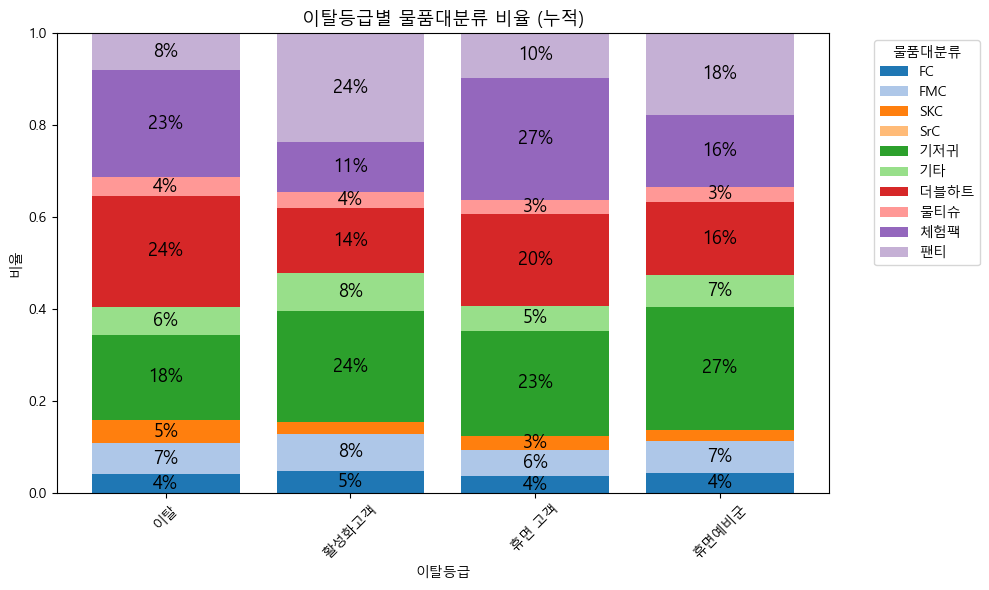

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 비율 테이블 생성 (pivot)
ratio_df = (
    df.groupby('이탈등급')['물품대분류']
    .value_counts(normalize=True)
    .rename('비율')
    .reset_index()
    .pivot(index='이탈등급', columns='물품대분류', values='비율')
    .fillna(0)
)

# 2. 시각화
plt.figure(figsize=(10, 6))
bottom = pd.Series([0] * len(ratio_df), index=ratio_df.index)
colors = plt.cm.tab20.colors  # 20개 카테고리 대응 가능

for i, column in enumerate(ratio_df.columns):
    plt.bar(ratio_df.index, ratio_df[column], bottom=bottom, label=column, color=colors[i % len(colors)])
    
    # 내부 퍼센트 텍스트
    for idx in ratio_df.index:
        val = ratio_df.loc[idx, column]
        if val > 0.03:
            plt.text(idx, bottom[idx] + val / 2, f"{val:.0%}", ha='center', va='center', fontsize=13)

    bottom += ratio_df[column]

# 3. 스타일 마무리
plt.title('이탈등급별 물품대분류 비율 (누적)', fontsize=13)
plt.ylabel('비율')
plt.xlabel('이탈등급')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='물품대분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [36]:
# 물품대분류 <-> 이탈등급 유의
print('📌 물품대분류 <-> 이탈등급 ')
tab = pd.crosstab(df['이탈등급'], df['물품대분류'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

📌 물품대분류 <-> 이탈등급 
χ² = 12621.30
p-value = 0.000
degrees of freedom = 27

Expected frequencies:
물품대분류           FC          FMC          SKC       SrC           기저귀  \
이탈등급                                                                   
이탈     1440.033244  2338.892411  1063.033525  2.004348   7858.868004   
활성화고객  2553.848263  4147.943352  1885.252533  3.554641  13937.425737   
휴면 고객  2233.940363  3628.351069  1649.096302  3.109369  12191.553568   
휴면예비군  1675.178129  2720.813168  1236.617640  2.331641   9142.152692   

물품대분류           기타          더블하트          물티슈           체험팩           팬티  
이탈등급                                                                      
이탈     2293.156824   6055.318839  1170.721700   6273.246178  5278.724926  
활성화고객  4066.832898  10738.894785  2076.233720  11125.381249  9361.632822  
휴면 고객  3557.400919   9393.686718  1816.154224   9731.759940  8188.947527  
휴면예비군  2667.609358   7044.099658  1361.890356   7297.612633  6140.694725  


In [202]:
df[df['물품대분류']=='더블하트']['상품명_정제'].drop_duplicates()

17            모유실감 젖병 노꼭지 트윈팩 애니멀
18                       모유실감 젖꼭지
23        젖꼭지 브러쉬 와이드형 젖병 스펀지 일반형
64                 모유실감 젖병 사이즈 꿀벌
65                 모유실감 젖병 오렌지 그린
                   ...           
152389                  노리개젖꼭지 블루
165715                레스랩 유아 섬유세제
171127               레스랩 유아 섬유유연제
174986               안티더스트 클렌징 오일
176417              안티더스트 배리어 미스트
Name: 상품명_정제, Length: 160, dtype: category
Categories (1767, object): ['', '가공유 멸균 딸기우유', '가공유 멸균 초콜릿 우유', '가슴 리프팅 크림', ..., '힘센보습 울트라 워시', '힘센보습 울트라 크리미오일', '힘센보습 울트라크림', '힙시트캐리어 쿨에어 카본그레이 침받이증정']

📊 [가설 2] 미혼이 많을 것이다 -> 차이없음

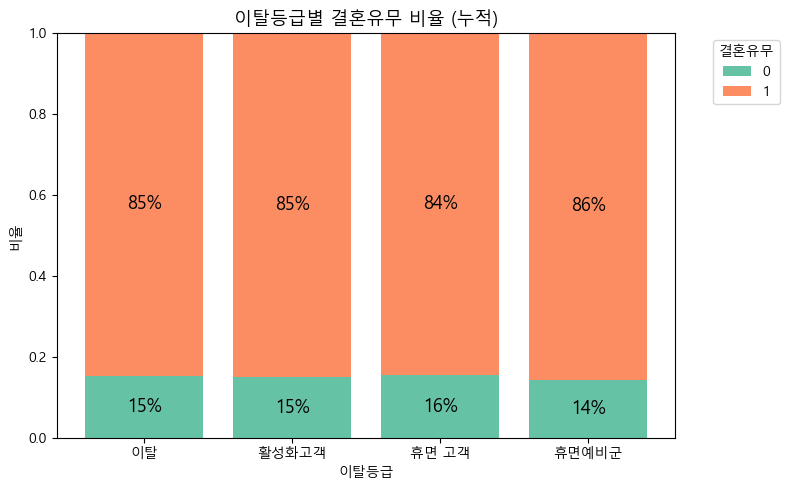

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 비율 데이터 계산 (pivot 구조로 변환)
ratio_df = (
    df.groupby('이탈등급')['결혼유무']
    .value_counts(normalize=True)
    .rename('비율')
    .reset_index()
    .pivot(index='이탈등급', columns='결혼유무', values='비율')
    .fillna(0)
)

# 2. 누적 막대 시각화
plt.figure(figsize=(8, 5))
bottom = pd.Series([0] * len(ratio_df), index=ratio_df.index)
colors = plt.cm.Set2.colors  # 부드러운 팔레트

for i, column in enumerate(ratio_df.columns):
    plt.bar(ratio_df.index, ratio_df[column], bottom=bottom, label=column, color=colors[i % len(colors)])

    # 퍼센트 표시 (3% 이상만)
    for idx in ratio_df.index:
        height = ratio_df.loc[idx, column]
        if height > 0.03:
            plt.text(idx, bottom[idx] + height / 2, f"{height:.0%}", ha='center', va='center', fontsize=13)

    bottom += ratio_df[column]

# 3. 스타일 마무리
plt.title('이탈등급별 결혼유무 비율 (누적)', fontsize=13)
plt.ylabel('비율')
plt.xlabel('이탈등급')
plt.ylim(0, 1)
plt.legend(title='결혼유무', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


📊 [가설 3] 거주지역은 로켓배송이 안 되는 지역일 것이다. -> 차이없음

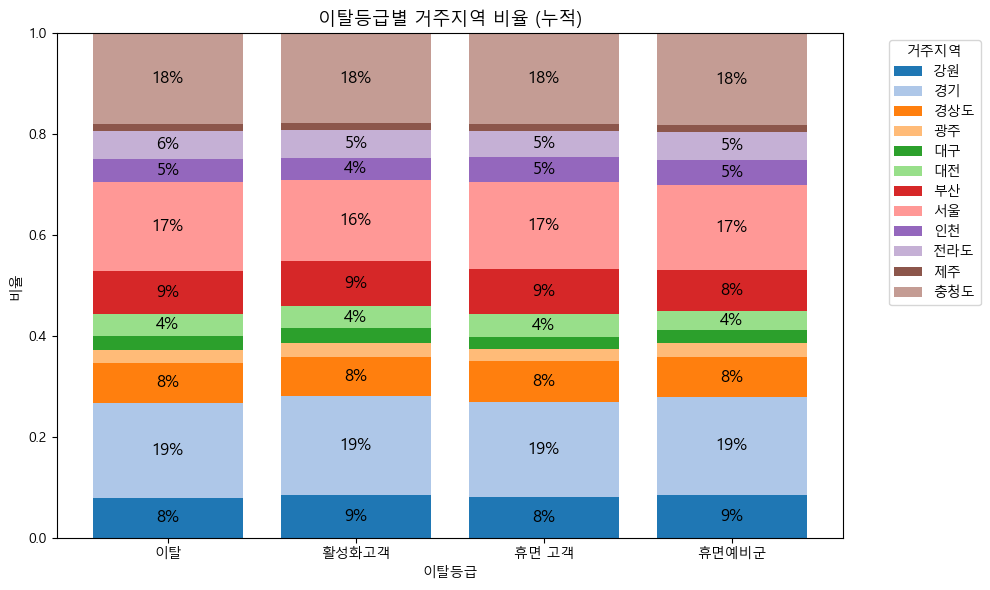

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 이탈등급별 거주지역 비율 계산
ratio_df = (
    df.groupby('이탈등급')['거주지역']
    .value_counts(normalize=True)
    .rename('비율')
    .reset_index()
    .pivot(index='이탈등급', columns='거주지역', values='비율')
    .fillna(0)
)

# 2. 시각화
plt.figure(figsize=(10, 6))
bottom = pd.Series([0]*len(ratio_df), index=ratio_df.index)
colors = plt.cm.tab20.colors  # 다양한 색상을 지원하는 팔레트

for i, column in enumerate(ratio_df.columns):
    plt.bar(ratio_df.index, ratio_df[column], bottom=bottom, label=column, color=colors[i % len(colors)])
    
    # 텍스트 표시 (3% 이상만)
    for idx in ratio_df.index:
        val = ratio_df.loc[idx, column]
        if val > 0.03:
            plt.text(idx, bottom[idx] + val / 2, f"{val:.0%}", ha='center', va='center', fontsize=12)

    bottom += ratio_df[column]

# 3. 마무리 스타일
plt.title('이탈등급별 거주지역 비율 (누적)', fontsize=13)
plt.ylabel('비율')
plt.xlabel('이탈등급')
plt.ylim(0, 1)
plt.legend(title='거주지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📊 [가설 4] 자녀가 없는 사람의 이탈이 클 것이다. -> 차이없음

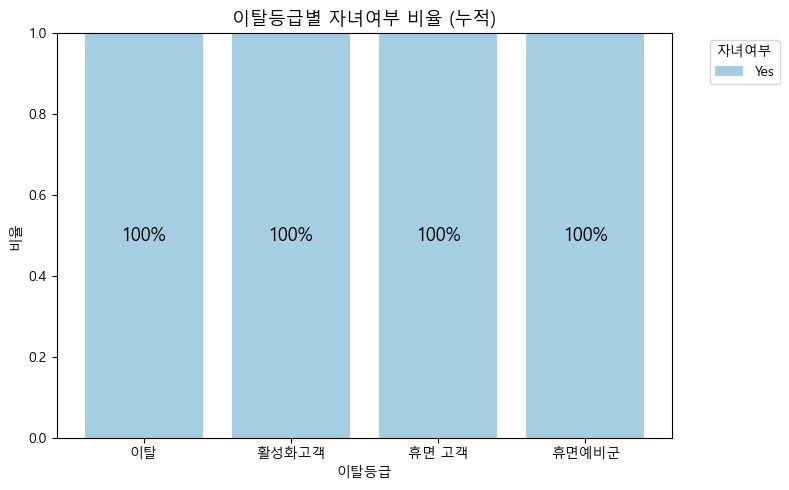

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 이탈등급별 자녀여부 비율 계산 (pivot 구조로)
ratio_df = (
    df.groupby('이탈등급')['자녀여부']
    .value_counts(normalize=True)
    .rename('비율')
    .reset_index()
    .pivot(index='이탈등급', columns='자녀여부', values='비율')
    .fillna(0)
)

# 2. 누적 막대 시각화
plt.figure(figsize=(8, 5))
bottom = pd.Series([0]*len(ratio_df), index=ratio_df.index)
colors = plt.cm.Paired.colors  # 예쁜 팔레트

for i, column in enumerate(ratio_df.columns):
    plt.bar(ratio_df.index, ratio_df[column], bottom=bottom, label=column, color=colors[i % len(colors)])
    
    # 3. 막대 안 텍스트 (%)
    for idx in ratio_df.index:
        height = ratio_df.loc[idx, column]
        if height > 0.03:  # 3% 미만은 생략
            plt.text(idx, bottom[idx] + height/2, f"{height:.0%}", ha='center', va='center', fontsize=13)

    bottom += ratio_df[column]

# 4. 스타일 마무리
plt.title('이탈등급별 자녀여부 비율 (누적)', fontsize=13)
plt.ylabel('비율')
plt.xlabel('이탈등급')
plt.ylim(0, 1)
plt.legend(title='자녀여부', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📊 [가설 5] 배송에 걸린 시간이 그렇지 않은 고객보다 클 것이다. -> 차이없음

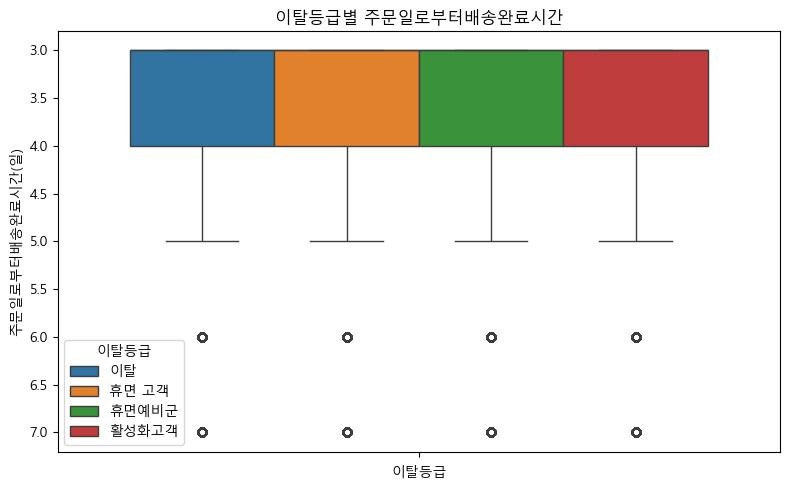

In [206]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='주문일로부터배송완료시간', hue='이탈등급')
plt.title('이탈등급별 주문일로부터배송완료시간')
plt.ylabel('주문일로부터배송완료시간(일)')
plt.xlabel('이탈등급')
plt.tight_layout()
plt.show()

📊 [가설 6] 택배이동기간이 더 길 것이다. -> 택배가 시작했으니 취소하지도 못하고 불만만 쌓임 -> 차이없음

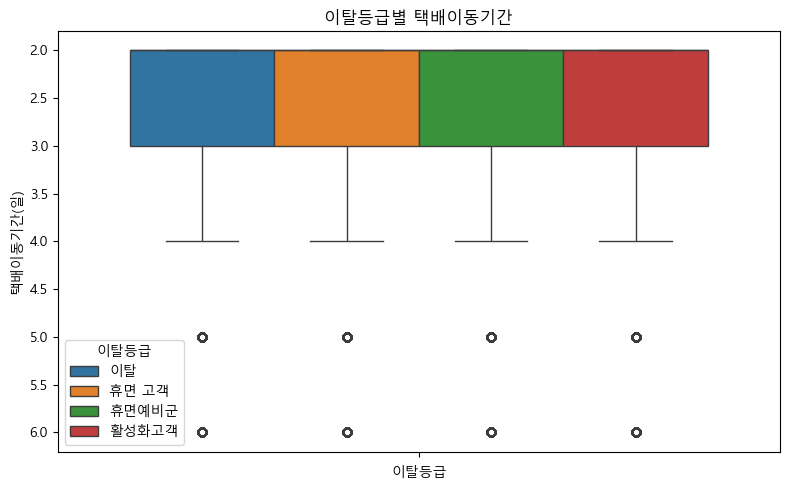

In [207]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='택배이동기간', hue='이탈등급')
plt.title('이탈등급별 택배이동기간')
plt.ylabel('택배이동기간(일)')
plt.xlabel('이탈등급')
plt.tight_layout()
plt.show()

📊 [가설 7] 기저귀단계가 높은 사람의 이탈이 클 것이다. -> 아이가 커서 더 이상 이용 필요없을 것  (통계적 유의)  
결론  
-> 한달무렵부터/뒤집고 기는 아기 비중이 크고, 활성화/휴면예비군은 걷고 시작하는 아기, 아장아장 걷는 아기의 비중이 큼  
-> 이탈, 휴면은 임산부~한달무렵, 뒤집고 기는 아기 비중이 큰 것을 보아, 초반에 이탈을 많이 하는 듯

In [208]:
tab = pd.crosstab(df['이탈등급'], df['기저귀단계'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

χ² = 2229.51
p-value = 0.000
degrees of freedom = 18

Expected frequencies:
기저귀단계   걷고 시작하는 아기     뒤집고 기는 아기  성장이 빠르고 활동적인 아기   아장아장 걷는 아기  잘 뛰고 활동적인 아기  \
이탈등급                                                                           
이탈     3874.660676   5494.589300        10.050812  1369.677983    267.730313   
활성화고객  9588.747218  13597.636610        24.873066  3389.586094    662.560804   
휴면 고객  6801.134770   9644.571603        17.642041  2404.175573    469.943072   
휴면예비군  6335.457335   8984.202487        16.434081  2239.560351    437.765811   

기저귀단계  태어난지 한달 무렵까지      한달 무렵부터  
이탈등급                              
이탈       624.898282  2170.392635  
활성화고객   1546.455848  5371.140359  
휴면 고객   1096.874743  3809.658198  
휴면예비군   1021.771127  3548.808808  


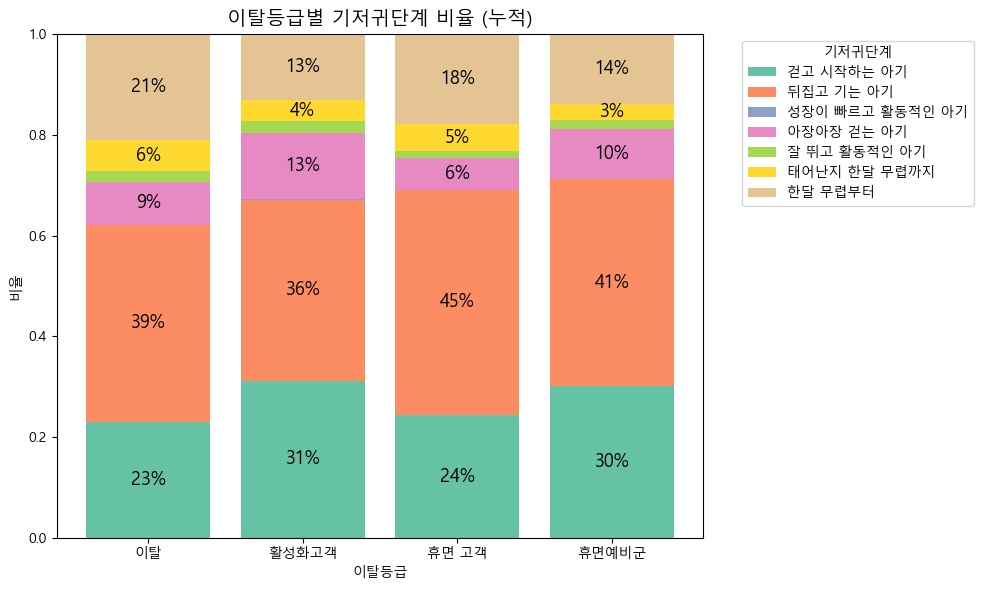

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 비율 테이블 생성 (pivot for stacking)
ratio_df = (
    df.groupby('이탈등급')['기저귀단계']
    .value_counts(normalize=True)
    .rename('비율')
    .reset_index()
    .pivot(index='이탈등급', columns='기저귀단계', values='비율')
    .fillna(0)
)

# 2. 시각화
plt.figure(figsize=(10, 6))
bottom = pd.Series([0]*len(ratio_df), index=ratio_df.index)

colors = plt.cm.Set2.colors  # 예쁜 컬러 팔레트

for i, column in enumerate(ratio_df.columns):
    plt.bar(ratio_df.index, ratio_df[column], bottom=bottom, label=column, color=colors[i % len(colors)])
    
    # 막대 안 텍스트
    for idx in ratio_df.index:
        height = ratio_df.loc[idx, column]
        if height > 0.03:  # 작은 비율은 생략
            plt.text(idx, bottom[idx] + height/2, f"{height:.0%}", ha='center', va='center', fontsize=13)
    
    bottom += ratio_df[column]

# 스타일 마무리
plt.title('이탈등급별 기저귀단계 비율 (누적)', fontsize=14)
plt.ylabel('비율')
plt.xlabel('이탈등급')
plt.ylim(0, 1)
plt.legend(title='기저귀단계', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📊 [가설 8] 고객등급은 저등급의 사람이 이탈이 클 것이다.  

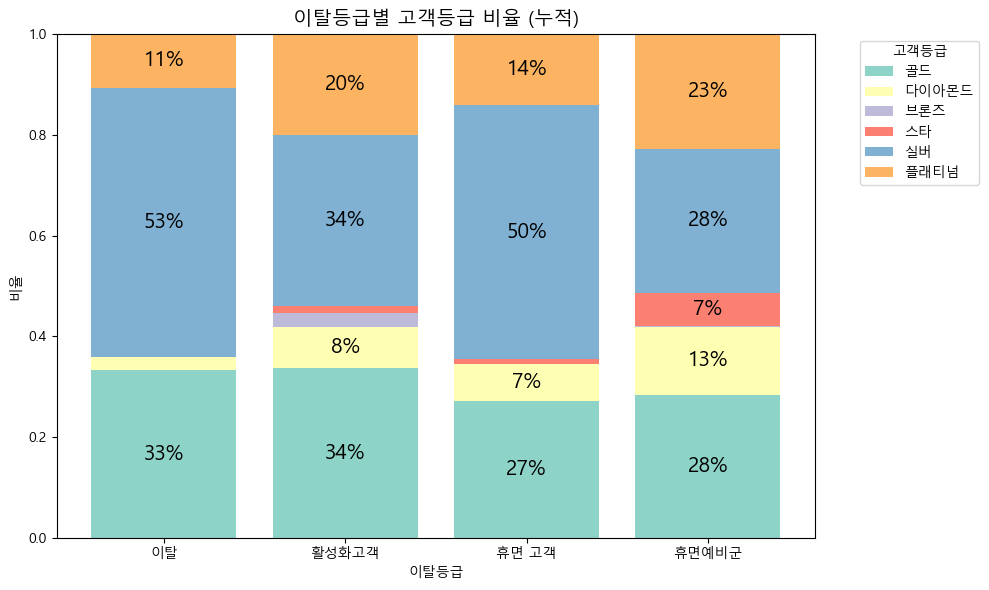

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 이탈등급별 고객등급 비율 계산 pivot
ratio_df = (
    df.groupby('이탈등급')['고객등급']
    .value_counts(normalize=True)
    .rename('비율')
    .reset_index()
    .pivot(index='이탈등급', columns='고객등급', values='비율')
    .fillna(0)
)

# 2. 누적 막대 시각화
plt.figure(figsize=(10, 6))
bottom = pd.Series([0]*len(ratio_df), index=ratio_df.index)
colors = plt.cm.Set3.colors  # 깔끔한 팔레트

for i, column in enumerate(ratio_df.columns):
    plt.bar(ratio_df.index, ratio_df[column], bottom=bottom, label=column, color=colors[i % len(colors)])
    
    # 3. 막대 안 비율 숫자 (%로)
    for idx in ratio_df.index:
        height = ratio_df.loc[idx, column]
        if height > 0.03:  # 3% 미만은 생략
            plt.text(idx, bottom[idx] + height / 2, f"{height:.0%}", ha='center', va='center', fontsize=15)

    bottom += ratio_df[column]

# 4. 스타일 마무리
plt.title('이탈등급별 고객등급 비율 (누적)', fontsize=14)
plt.ylabel('비율')
plt.xlabel('이탈등급')
plt.ylim(0, 1)
plt.legend(title='고객등급', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [246]:
df.columns

Index(['주문번호', '배송완료일', '배송시작일', '구매일', '구매시월령', '고객번호', '구매금액', '결제금액',
       '물품대분류', '상품명', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부',
       '물품판매량', '제품단가', '주문일로부터배송완료시간', '택배이동기간', '기저귀단계', '남아여아공용', '브랜드',
       '원플원', '핫딜', '아이정보건너뛰기', '구매시월령_bin', '상품명_정제', '총주문횟수', '마지막구매일',
       '고객휴면일수', '최근3개월구매금액', '고객등급', '등급별혜택_상품쿠폰', '등급별혜택_쇼핑지원금',
       '등급별혜택_무료배송쿠폰', '이탈등급'],
      dtype='object')

In [247]:
all_cols = set(['주문번호', '배송완료일', '배송시작일', '구매일', '구매시월령', '고객번호', '구매금액', '결제금액',
       '물품대분류', '상품명', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부',
       '물품판매량', '제품단가', '주문일로부터배송완료시간', '택배이동기간', '기저귀단계', '남아여아공용', '브랜드',
       '원플원', '핫딜', '아이정보건너뛰기', '구매시월령_bin', '상품명_정제', '총주문횟수', '마지막구매일',
       '고객휴면일수', '최근3개월구매금액', '고객등급', '등급별혜택_상품쿠폰', '등급별혜택_쇼핑지원금',
       '등급별혜택_무료배송쿠폰', '이탈등급'])

drop_cols_1 = set('상품명_정제 물품대분류 결혼유무 자녀여부 주문번호 거주지역 주문일로부터배송완료시간 택배이동기간 기저귀단계 고객등급'.split())
drop_cols_2 = set('고객번호 구매일 배송시작일 마지막구매일 배송완료일 상품명'.split())

result_cols = list(all_cols - drop_cols_1 - drop_cols_2)

cat_cols = '브랜드 결제등록카드 남아여아공용 유입경로 성별 아이정보건너뛰기 구매시월령_bin 고객등급 등급별혜택_상품쿠폰 등급별혜택_쇼핑지원금 등급별혜택_무료배송쿠폰'.split()
num_cols = list(set(result_cols)-set(cat_cols)-set(['이탈등급']))
print(cat_cols)
print(num_cols)

['브랜드', '결제등록카드', '남아여아공용', '유입경로', '성별', '아이정보건너뛰기', '구매시월령_bin', '고객등급', '등급별혜택_상품쿠폰', '등급별혜택_쇼핑지원금', '등급별혜택_무료배송쿠폰']
['구매금액', '원플원', '결제금액', '물품판매량', '최근3개월구매금액', '고객휴면일수', '제품단가', '구매시월령', '총주문횟수', '핫딜', '연령']


In [248]:
for col in num_cols:
    display(pd.DataFrame(df.groupby('이탈등급')[col].mean()))

for col in cat_cols:
    ct = pd.crosstab(df['이탈등급'], df[col], normalize='index')  # 비율 기준
    display(ct.style.format("{:.1%}"))

,구매금액
이탈등급,
이탈,28946.203589
활성화고객,38458.363108
휴면 고객,30206.471284
휴면예비군,38268.484818


,원플원
이탈등급,
이탈,0.009860
활성화고객,0.004842
휴면 고객,0.002787
휴면예비군,0.002647


,결제금액
이탈등급,
이탈,20839.788299
활성화고객,26525.709771
휴면 고객,21699.713072
휴면예비군,27712.961567


,물품판매량
이탈등급,
이탈,1684.847605
활성화고객,677.475824
휴면 고객,2219.476953
휴면예비군,890.078623


,최근3개월구매금액
이탈등급,
이탈,38810.233849
활성화고객,65962.800347
휴면 고객,52581.934743
휴면예비군,108877.115274


,고객휴면일수
이탈등급,
이탈,453.045864
활성화고객,36.916402
휴면 고객,269.164163
휴면예비군,132.987808


,제품단가
이탈등급,
이탈,28586.837330
활성화고객,38119.466007
휴면 고객,29781.300784
휴면예비군,37613.529359


,구매시월령
이탈등급,
이탈,15.200687
활성화고객,12.736785
휴면 고객,10.588724
휴면예비군,12.152587


,총주문횟수
이탈등급,
이탈,2.036833
활성화고객,10.593382
휴면 고객,3.379898
휴면예비군,8.361959


,핫딜
이탈등급,
이탈,0.000000
활성화고객,0.001953
휴면 고객,0.000000
휴면예비군,0.000000


,연령
이탈등급,
이탈,32.796115
활성화고객,32.860337
휴면 고객,32.832993
휴면예비군,32.777495


브랜드,Go-MINI,etc,굿나이트,그린핑거,꿈비,너프,누들앤부,누텔라,뉴나,뉴오리진,닥터마밍,더블하트,데르뜨,도담도담오가닉,도브,드시모네,디어에코,디즈니베이비,디펜드,라그랑,라네이처,라밀로우,라인프렌즈,레고,레드투래드,룰라러브,리틀누,리틀마마,릴라스틸,릴리유,립톤,마더니아,마이포코리아,맘마밀,맘큐,매일우유,매직캔,먼치킨,메가블럭,메릴린,몽슈레,무무브,믹스드페어스,바세린,베이비머핀,베이비아인슈타인,보니타베베,보보앤부,보쉬토이,본토이,브라이트스타트,브리카,비박스,비츠,뽀드미엘,뽀로로,뿌띠슈,쁘띠베베,산골간식,상하목장,상하치즈,순수담다,스와들디자인,스와들업,스카트,시크릿쥬쥬,신비아파트,실리만,씨알로,아이스크림페어리,아이엠스페셜,야마토야,에르고베이비,에르고파우치,에불로보,엔픽스,엘비니,엘트라,오볼,올라베이비,요미요미,윈펀,유한양행,율그란,젤리맘,조이,좋은느낌,카가앤푸치,캐스돈,캐시크루즈,콱스,크리넥스,키썸플레이,탑브라이트,테스,트레제메,트루자임,티엔,퓨리티,플레이도,플레이도우,피에스타,필리앤임프스,핑크퐁,하기스,해밀턴,화이트
이탈등급,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
이탈,0.0%,0.1%,0.1%,6.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.6%,24.3%,0.0%,0.1%,0.1%,0.1%,0.0%,0.0%,0.1%,0.0%,0.2%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,2.4%,0.0%,0.0%,0.0%,0.0%,8.4%,0.0%,0.0%,0.5%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.9%,0.0%,0.0%,0.7%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,3.3%,0.0%,0.0%,0.0%,0.0%,7.8%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.2%,42.0%,0.0%,0.8%
활성화고객,0.0%,0.1%,0.1%,3.4%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.3%,14.4%,0.0%,0.1%,0.0%,0.0%,0.0%,0.1%,0.1%,0.0%,0.5%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,1.8%,0.0%,0.0%,0.0%,0.1%,1.4%,0.1%,0.0%,0.6%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.1%,0.1%,0.0%,0.0%,0.0%,1.3%,0.0%,0.0%,0.7%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.3%,0.0%,0.0%,0.2%,0.0%,0.0%,3.8%,0.0%,0.0%,0.0%,0.0%,9.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.1%,0.2%,59.2%,0.0%,0.7%
휴면 고객,0.0%,0.1%,0.1%,4.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.4%,20.0%,0.0%,0.2%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,1.7%,0.0%,0.0%,0.0%,0.0%,12.5%,0.0%,0.0%,0.6%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.2%,0.0%,0.0%,0.0%,0.0%,0.0%,0.9%,0.0%,0.0%,0.4%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,3.3%,0.0%,0.0%,0.0%,0.0%,5.9%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.1%,0.1%,47.6%,0.0%,0.5%
휴면예비군,0.0%,0.1%,0.1%,3.5%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.2%,16.2%,0.0%,0.1%,0.0%,0.0%,0.0%,0.1%,0.1%,0.0%,0.2%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,1.9%,0.0%,0.0%,0.0%,0.0%,2.2%,0.0%,0.0%,0.7%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.9%,0.0%,0.0%,0.7%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.1%,0.0%,0.3%,0.0%,0.0%,0.2%,0.0%,0.0%,3.7%,0.0%,0.0%,0.0%,0.0%,8.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.2%,0.0%,0.0%,0.0%,0.0%,0.1%,0.1%,58.9%,0.0%,0.6%


결제등록카드,BC카드,SC제일은행,경남은행,광주은행,국민은행,기업은행,농협중앙회,농협회원조합,대구은행,롯데카드,미래에셋증권,부산은행,삼성카드,새마을금고,신한은행,신협중앙회,씨티은행,우리은행,우체국,하나은행,현대카드
이탈등급,,,,,,,,,,,,,,,,,,,,,
이탈,3.2%,1.0%,0.3%,1.4%,17.9%,3.1%,9.5%,11.4%,0.6%,13.2%,0.3%,1.6%,2.2%,1.7%,15.0%,0.5%,0.9%,9.4%,0.8%,3.7%,2.8%
활성화고객,3.3%,1.0%,0.3%,1.6%,17.4%,3.0%,9.8%,11.4%,0.6%,12.9%,0.3%,2.0%,1.9%,1.4%,15.6%,0.3%,0.8%,8.9%,0.7%,4.1%,2.5%
휴면 고객,3.2%,1.0%,0.3%,1.3%,17.8%,3.0%,9.8%,11.2%,0.6%,13.9%,0.2%,1.8%,2.0%,1.5%,14.9%,0.6%,0.8%,8.8%,0.8%,3.7%,2.7%
휴면예비군,3.6%,0.8%,0.2%,1.6%,17.5%,3.0%,9.3%,11.8%,0.5%,13.8%,0.2%,1.6%,2.1%,2.0%,15.3%,0.5%,0.9%,8.4%,0.6%,3.7%,2.7%


남아여아공용,공용,남아,여아
이탈등급,,,
이탈,33.4%,34.2%,32.4%
활성화고객,37.0%,30.4%,32.6%
휴면 고객,33.6%,34.0%,32.4%
휴면예비군,30.7%,34.9%,34.4%


유입경로,검색광고,네이버블로그,네이버카페,매장쿠폰,오픈마켓,이마트,인스타그램,지인추천,직접검색,페이스북
이탈등급,,,,,,,,,,
이탈,10.0%,28.2%,6.9%,0.5%,2.4%,0.3%,38.4%,10.2%,1.3%,1.8%
활성화고객,9.6%,28.4%,7.2%,0.6%,2.7%,0.3%,37.9%,10.2%,1.5%,1.7%
휴면 고객,10.4%,28.0%,7.0%,0.5%,2.6%,0.3%,38.8%,9.4%,1.4%,1.7%
휴면예비군,9.6%,28.4%,6.8%,0.3%,2.4%,0.2%,39.5%,9.8%,1.3%,1.6%


성별,남,여
이탈등급,,
이탈,3.2%,96.8%
활성화고객,3.6%,96.4%
휴면 고객,3.0%,97.0%
휴면예비군,2.7%,97.3%


아이정보건너뛰기,0,1
이탈등급,,
이탈,95.0%,5.0%
활성화고객,95.9%,4.1%
휴면 고객,94.7%,5.3%
휴면예비군,94.2%,5.8%


구매시월령_bin,고등학생,미취학아동,성인,중학생,초등학생,태아
이탈등급,,,,,,
이탈,0.1%,85.4%,0.0%,0.2%,1.8%,12.5%
활성화고객,0.0%,95.3%,0.0%,0.1%,1.3%,3.3%
휴면 고객,0.1%,85.8%,0.0%,0.1%,1.3%,12.7%
휴면예비군,0.1%,94.1%,0.0%,0.2%,1.0%,4.5%


고객등급,골드,다이아몬드,브론즈,스타,실버,플래티넘
이탈등급,,,,,,
이탈,33.3%,2.5%,0.0%,0.2%,53.2%,10.7%
활성화고객,33.8%,8.0%,2.9%,1.4%,33.9%,20.0%
휴면 고객,27.2%,7.2%,0.0%,1.0%,50.4%,14.1%
휴면예비군,28.5%,13.4%,0.2%,6.7%,28.4%,22.9%


등급별혜택_상품쿠폰,15%쿠폰1장,20%쿠폰1장,이달의쿠폰팩
이탈등급,,,
이탈,97.3%,2.7%,0.0%
활성화고객,87.7%,9.4%,2.9%
휴면 고객,91.7%,8.3%,0.0%
휴면예비군,79.8%,20.0%,0.2%


등급별혜택_쇼핑지원금,1천원 1장,2천원 1장,2천원 2징,2천원 3장,2천원 4장,X
이탈등급,,,,,,
이탈,53.2%,33.3%,10.7%,2.5%,0.2%,0.0%
활성화고객,33.9%,33.8%,20.0%,8.0%,1.4%,2.9%
휴면 고객,50.4%,27.2%,14.1%,7.2%,1.0%,0.0%
휴면예비군,28.4%,28.5%,22.9%,13.4%,6.7%,0.2%


등급별혜택_무료배송쿠폰,X,배송비 무료 2회,배송비 무료 3회,배송비 무료 4회,배송비 무료 5회
이탈등급,,,,,
이탈,53.2%,33.3%,10.7%,2.5%,0.2%
활성화고객,36.7%,33.8%,20.0%,8.0%,1.4%
휴면 고객,50.4%,27.2%,14.1%,7.2%,1.0%
휴면예비군,28.6%,28.5%,22.9%,13.4%,6.7%


In [249]:
df.groupby('이탈등급')['고객휴면일수'].describe()

,count,mean,std,min,25%,50%,75%,max
이탈등급,,,,,,,,
이탈,33774.0,453.045864,63.170872,361.0,395.0,442.0,506.0,590.0
활성화고객,59894.0,36.916402,23.234806,6.0,17.0,34.0,50.0,90.0
휴면 고객,52393.0,269.164163,50.789270,181.0,230.0,269.0,308.0,360.0
휴면예비군,39289.0,132.987808,25.536251,91.0,113.0,130.0,155.0,180.0


### [총주문횟수 <-> 이탈등급]
- 활성화고객 평균 주문횟수가 이탈 고객보다 약 8.56회 더 많다.
- 휴면 고객 평균 주문횟수가 이탈 고객보다 약 1.34회 더 많다.
- 휴면예비군 평균 주문횟수가 이탈 고객보다 약 6.33회 더 많다.
- 휴면 고객 평균 주문횟수가 활성화고객보다 약 7.21회 적다.
- 휴면예비군 평균 주문횟수가 활성화고객보다 약 2.23회 적다.
- 휴면예비군 평균 주문횟수가 활성화고객보다 약 2.23회 적다.
- 휴면예비군 평균 주문횟수가 휴면 고객보다 약 4.98회 더 많다.

### [자녀월연령 <-> 이탈등급]
    - 아이가 클수록 또는 어릴수록 이탈하였는데 > 사이트가 안 맞아서 할인쿠폰 정도만 쓰고 초장에 이탈한 듯
- 고객이 가장 최근 주문한 날짜는 평균적으로 활성화고객 36일 전, 휴면예비군 132일 전, 휴면고객 269일 전, 이탈고객 453일 전
- 평균결제금액은 활성화고객 2.6 > 휴면예비군 2.7 > 휴면 2.1> 이탈 2.0 으로 활성화고객, 휴면예비군에 주력할 필요가 있음
- 제품단가 또한 활성화고객 3.8 = 휴면예비군 3.8 > 휴면 3.0 > 이탈 2.9로 활성화&휴면예비군이 꾸준히 쓰고, 제품단가가 높은 상품을 구매함
- 구매금액도 마찬가지 활성화고객 3.8 > 휴면예비군 3.7 > 휴면 2.9 > 이탈 2.8
- 1+1상품 : 이탈고객 0.09 > 활성화고객 0.04
- 활성화고객은 핫딜을 다른 집단보다 많이 구매함
- 연령은 모두 32세로 어린아이 부모층이 주력 고객인 듯
- (유의) 휴면예비군, 활성화고객은 하기스를 약 59%가 구매하며, 이탈고객/휴면고객 42%에 비해 매우 높았음 -> 휴면예비군, 활성화고객은 일상적인 용품, 필수품을 많이 구매함
- 활성화 고객은 유의미하게 공용제품을 많이 구매함. 37%로 다른 집단 33, 30%에 비해 높은 수치.
- 이탈, 휴면고객은 다른 집단에 비해 아이정보를 건너뜀. 가볍게 구매하려고 대충 기입한 듯(약간)
- **이탈, 휴면 고객은 임산부가 매우 많음!!! 이탈&휴면 12.5~12.7% > 활성화&휴면예비 3.%3~4.5%**
- **근데 이탈고객은 평균 휴면일수가 453일, 휴면고객은 269일임 -> 산달이 300일 정도니까, 출산 후, 신생아 시절의 정신없는 때를 지나면 다시 쇼핑몰을 찾을 가능성도 있음 -> 유도 전략 필요** -> 아이가 너무 어리거나 크면 쇼핑몰을 떠나지만, 그 사이에는 활성화고객이 많음. 그러니 1년 이상의 휴면고객일지라도 좋은 상품과 전략으로 고객을 맘큐 쇼핑몰을 장기적 이용하도록 유도 필요  
  활성화고객, 휴면예비군은 주로 95%가 미취학아동

## 왜 이탈했을까?
  | 관찰 지표                               | 패턴 & 해석                    | 잠재 원인                                              |
| ----------------------------------- | -------------------------- | -------------------------------------------------- |
| **총주문횟수 2\~3회** (이탈·휴면)             | 가입 직후 “맛보기”만 하고 떠남         | ▸ 사이트/서비스 fit 미흡<br>▸ 초기 온보딩·혜택 소진 후 매력 ↓          |
| **최근 주문 간격** 270 \~ 450 일           | 아예 관심이 끊긴 장기 공백            | ▸ 라이프사이클 상 수요 소멸(임신·출산 직후)<br>▸ 리마인드/재구매 유도 부재     |
| **결제 금액·단가 낮음**                     | 저가·프로모션 위주 소비              | ▸ 가격 민감층(쿠폰·1 + 1 노출 후 이탈)<br>▸ 고가·구독형 상품 가치 전달 실패 |
| **1 + 1 비중 > Hot Deal** (이탈)        | ‘대량 구매’ 대신 ‘손쉽게 체험’        | ▸ 트래픽용 프로모션이 실구매/충성으로 전환 X                         |
| **임산부 비율 12 %+** (이탈·휴면)            | 출산 전 체험 후, 출산·육아 초기엔 ‘정지’  | ▸ 출산 직후 물리적‧심리적 여유 부족<br>▸ 산후 필요품 리스트·구독 제안 부재     |
| **HUGGIES 매출 42 %**(이탈) vs 59 %(활성) | 코어 기저귀 브랜드 유입은 성공 → 리텐션 실패 | ▸ 리필/정기배송 전환 안 됨<br>▸ 경쟁 채널(오픈-마켓, 쿠팡)로 이동         |
| **아이 정보 누락 多**                      | “초기 방문 + 최소 입력” 후 구매       | ▸ 퍼스널라이즈드 추천·혜택 불가 → 이탈 가속                         |
## 🎯 고객군별 리텐션·재활성 전략
| 세그먼트                              | 인사이트                              | Recommended Action                                                                                                                                 |
| --------------------------------- | --------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **임산부 (휴면·이탈 12 %)**              | ⭐ 산달 300 일 이후 ‘아기를 안고 돌아올 수 있는 군’ | 1. **출산 200 일 전후 자동 메일/SMS** <br> • “출산 준비 체크리스트 + 샘플키트” <br> • 예정일 기반 쿠폰(기저귀 1 개월 구독 50 %)<br>2. **산후 45 일 ‘생존 키트’** <br> • 밤기저귀/수유패드 번들, 새벽배송 안내 |
| **쿠폰 · 1 + 1 체험층 (이탈 0-3회 주문)**   | 프로모션만 탐색 후 가격 민감                  | 1. **혜택-후-구독 유도**<br> • 첫 구매 15 % → 정기배송 10 % 상시<br>2. **소액 · 즉시 사용 포인트**<br> • 리뷰·아이 정보 등록 시 3,000 P                                              |
| **휴면예비군 (최근 4–6 개월 공백, 주문 8 회↑)** | 브랜드·단가 모두 높음 = 가치 느끼던 고객          | 1. **‘내가 사랑한 브랜드’ 리마인드**<br> • 과거 TOP 3 브랜드 가격추적 알림<br>2. **장바구니 Re-Targeting**<br> • 마지막 본 상품 + 무료반품 배너                                           |
| **활성화 고객 (구매 10 회↑, 고단가)**        | 충성·High-Value                     | 1. **VIP 전용 라운지/온·오프 연계** <br> • 체험단·딜리버리 박스 사전 예약<br>2. **친구 추천 + 캐시백** <br> • ‘초보맘 도우미’ 코드 공유 → 양쪽 적립                                            |

## 실행로드랩
| 단계                   | 무엇을                        | KPI                   | 툴/데이터           |
| -------------------- | -------------------------- | --------------------- | --------------- |
| **1 ) 세그먼트 태깅**      | RFM + 아이 나이 + 임산부 여부       | Tag 정확도 > 95 %        | CDP·CRM         |
| **2 ) 이벤트 트리거**      | 예정일, 마지막 구매일, 장바구니 이탈      | 오픈율 > 35 %, CTR > 8 % | Braze / 카카오 알림톡 |
| **3 ) 정기배송 MVP**     | 기저귀·물티슈 번들 3종              | 구독 전환율 8 %            | Shopify Plug-in |
| **4 ) 리뷰·정보 수집 캠페인** | 아이 정보 입력 시 3,000 P         | 프로필 완성률 +20 pt        | 웹 / 앱 모듈        |
| **5 ) 복귀 프로모션 A/B**  | “산후 45 일 키트” vs “첫돌 기념 박스” | 복귀율, CAC 대비 LTV       | GA4 + 매출 DB     |

## ✨ Key Takeaways
초기 체험-후-이탈이 가장 큰 구멍 → 온보딩 30 일 안에 정기배송·혜택 고리로 묶어야 함.

임산부→산후 재니즈가 시간차로 폭발 ⇢ 예정일 트리거 마케팅이 핵심.

고단가·브랜드 중심 고객은 리마인드만 해도 돌아온다 — 맞춤 푸시 & 장바구니 리타겟팅으로 회수.

**데이터 수집(아이 정보·리뷰)**가 곧 LTV — 입력 장벽을 낮추고 즉시 보상.

프로모션 휘발성을 ‘구독·포인트·커뮤니티’로 전환해야 churn curve 완화.

이 로드맵을 그대로 실행해보시면 6개월 내 재구매율 +10 pt / 휴면복귀 +5 pt 정도의 개선을 기대할 수 있습니다. 필요하시면 세부 캠페인 메시지나 푸시 템플릿도 바로 드릴게요!

# 통계 검정

In [214]:
# 총주문횟수 <-> 이탈등급 유의
print('📌 총주문횟수 <-> 이탈등급 ')
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

# 그룹별 데이터
uni = ['이탈', '휴면 고객', '휴면예비군', '활성화고객']
groups = [df.loc[df['이탈등급']==u, '총주문횟수'] for u in uni]

# 1) 정규성 검정 (샤피로) # 모두 정규성 안 따름
for u, g in zip(uni, groups):
    stat, p = shapiro(g)
    print(f"{u} Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")

# 2) ruskal–Wallis 검정
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H-statistic = {stat:.3f}, p-value = {p:.3e}")


# 3) Dunn’s test 사후검정
data = df[['이탈등급', '총주문횟수']]

# Dunn's test (Bonferroni 교정)
posthoc = sp.posthoc_dunn(
    data,
    val_col='총주문횟수',
    group_col='이탈등급',
    p_adjust='bonferroni'
)

print(posthoc)

📌 총주문횟수 <-> 이탈등급 
이탈 Shapiro-Wilk: stat=0.711, p=0.000
휴면 고객 Shapiro-Wilk: stat=0.788, p=0.000
휴면예비군 Shapiro-Wilk: stat=0.698, p=0.000
활성화고객 Shapiro-Wilk: stat=0.834, p=0.000
Kruskal–Wallis H-statistic = 79221.465, p-value = 0.000e+00
        이탈  활성화고객  휴면 고객  휴면예비군
이탈     1.0    0.0    0.0    0.0
활성화고객  0.0    1.0    0.0    0.0
휴면 고객  0.0    0.0    1.0    0.0
휴면예비군  0.0    0.0    0.0    1.0


- 정규성 검정  
네 그룹 모두 p < 0.05로 “정규분포를 따르지 않음”

- Kruskal–Wallis 검정  
H = 79221.47, p ≈ 0 ⇒ 네 집단 간 ‘총주문횟수’ 중앙값 차이가 통계적으로 매우 유의하다

- 결론

    - 활성화고객 > 휴면예비군 > 휴면 고객 > 이탈 순으로 주문횟수 차이

    - 활성화고객이 가장 많이, 이탈 고객이 가장 적게 주문한다

In [215]:
# 구매시월령 <-> 이탈등급 유의
print('📌 구매시월령 <-> 이탈등급 ')
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

# 그룹별 데이터
uni = ['이탈', '휴면 고객', '휴면예비군', '활성화고객']
groups = [df.loc[df['이탈등급']==u, '구매시월령'] for u in uni]

# 1) 정규성 검정 (샤피로) # 모두 정규성 안 따름
for u, g in zip(uni, groups):
    stat, p = shapiro(g)
    print(f"{u} Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")

# 2) ruskal–Wallis 검정
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H-statistic = {stat:.3f}, p-value = {p:.3e}")


# 3) Dunn’s test 사후검정
data = df[['이탈등급', '구매시월령']]

# Dunn's test (Bonferroni 교정)
posthoc = sp.posthoc_dunn(
    data,
    val_col='구매시월령',
    group_col='이탈등급',
    p_adjust='bonferroni'
)

print(posthoc)

📌 구매시월령 <-> 이탈등급 
이탈 Shapiro-Wilk: stat=0.664, p=0.000
휴면 고객 Shapiro-Wilk: stat=0.558, p=0.000
휴면예비군 Shapiro-Wilk: stat=0.526, p=0.000
활성화고객 Shapiro-Wilk: stat=0.559, p=0.000
Kruskal–Wallis H-statistic = 5786.771, p-value = 0.000e+00
                  이탈         활성화고객         휴면 고객          휴면예비군
이탈      1.000000e+00  0.000000e+00  7.057977e-97  2.524635e-104
활성화고객   0.000000e+00  1.000000e+00  0.000000e+00   6.975676e-86
휴면 고객   7.057977e-97  0.000000e+00  1.000000e+00   0.000000e+00
휴면예비군  2.524635e-104  6.975676e-86  0.000000e+00   1.000000e+00


* **정규성 검정**
  네 그룹 모두 p < 0.05로 “정규분포를 따르지 않음”

* **Kruskal–Wallis 검정**
  H = 5786.771, p ≈ 0 ⇒ 네 집단 간 ‘구매시월령’ 중앙값 차이가 통계적으로 매우 유의하다

* **결론**

  * 중앙값 순위: 활성화고객 > 휴면예비군 > 휴면 고객 > 이탈
  * 활성화고객이 가장 높은, 이탈 고객이 가장 낮은 구매시월령을 보인다

In [216]:
# 결제금액 <-> 이탈등급 유의

print('📌 결제금액 <-> 이탈등급 ')
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

# 그룹별 데이터
uni = ['이탈', '휴면 고객', '휴면예비군', '활성화고객']
groups = [df.loc[df['이탈등급']==u, '결제금액'] for u in uni]

# 1) 정규성 검정 (샤피로) # 모두 정규성 안 따름
for u, g in zip(uni, groups):
    stat, p = shapiro(g)
    print(f"{u} Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")

# 2) ruskal–Wallis 검정
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H-statistic = {stat:.3f}, p-value = {p:.3e}")


# 3) Dunn’s test 사후검정
data = df[['이탈등급', '결제금액']]

# Dunn's test (Bonferroni 교정)
posthoc = sp.posthoc_dunn(
    data,
    val_col='결제금액',
    group_col='이탈등급',
    p_adjust='bonferroni'
)

print(posthoc)

📌 결제금액 <-> 이탈등급 
이탈 Shapiro-Wilk: stat=0.799, p=0.000
휴면 고객 Shapiro-Wilk: stat=0.795, p=0.000
휴면예비군 Shapiro-Wilk: stat=0.848, p=0.000
활성화고객 Shapiro-Wilk: stat=0.861, p=0.000
Kruskal–Wallis H-statistic = 4480.897, p-value = 0.000e+00
        이탈         활성화고객  휴면 고객         휴면예비군
이탈     1.0  0.000000e+00    1.0  0.000000e+00
활성화고객  0.0  1.000000e+00    0.0  1.188516e-14
휴면 고객  1.0  0.000000e+00    1.0  0.000000e+00
휴면예비군  0.0  1.188516e-14    0.0  1.000000e+00


* **정규성 검정**
  네 그룹 모두 p < 0.05로 “정규분포를 따르지 않음”

* **Kruskal–Wallis 검정**
  H = 4480.897, p ≈ 0 ⇒ 네 집단 간 ‘결제금액’ 중앙값 차이가 통계적으로 매우 유의하다

* **결론**

  * 중앙값 순위: 활성화고객 > 휴면예비군 > (이탈 ≈ 휴면 고객)
  * 활성화고객과 휴면예비군의 결제금액 중앙값이 이탈·휴면 고객보다 유의하게 높음

In [217]:
# 제품단가 <-> 이탈등급 유의
print('📌 제품단가 <-> 이탈등급 ')
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

# 그룹별 데이터
uni = ['이탈', '휴면 고객', '휴면예비군', '활성화고객']
groups = [df.loc[df['이탈등급']==u, '제품단가'] for u in uni]

# 1) 정규성 검정 (샤피로) # 모두 정규성 안 따름
for u, g in zip(uni, groups):
    stat, p = shapiro(g)
    print(f"{u} Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")

# 2) ruskal–Wallis 검정
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H-statistic = {stat:.3f}, p-value = {p:.3e}")


# 3) Dunn’s test 사후검정
data = df[['이탈등급', '제품단가']]

# Dunn's test (Bonferroni 교정)
posthoc = sp.posthoc_dunn(
    data,
    val_col='제품단가',
    group_col='이탈등급',
    p_adjust='bonferroni'
)

print(posthoc)

📌 제품단가 <-> 이탈등급 
이탈 Shapiro-Wilk: stat=0.849, p=0.000
휴면 고객 Shapiro-Wilk: stat=0.837, p=0.000
휴면예비군 Shapiro-Wilk: stat=0.876, p=0.000
활성화고객 Shapiro-Wilk: stat=0.892, p=0.000
Kruskal–Wallis H-statistic = 4277.482, p-value = 0.000e+00
             이탈     활성화고객     휴면 고객     휴면예비군
이탈     1.000000  0.000000  0.422483  0.000000
활성화고객  0.000000  1.000000  0.000000  0.808294
휴면 고객  0.422483  0.000000  1.000000  0.000000
휴면예비군  0.000000  0.808294  0.000000  1.000000


* **정규성 검정**
  네 그룹 모두 p < 0.05로 “정규분포를 따르지 않음”

* **Kruskal–Wallis 검정**
  H = 4277.482, p ≈ 0 ⇒ 네 집단 간 ‘제품단가’ 중앙값 차이가 통계적으로 매우 유의함

* **결론**

  * 중앙값 순위: **휴면예비군 ≈ 활성화고객 > 휴면 고객 ≈ 이탈**
  * 상위 클러스터(휴면예비군, 활성화고객)와 하위 클러스터(휴면 고객, 이탈) 간에는 유의미한 차이가 있음

In [218]:
# 구매금액 <-> 이탈등급 유의
print('📌 구매금액 <-> 이탈등급 ')
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

# 그룹별 데이터
uni = ['이탈', '휴면 고객', '휴면예비군', '활성화고객']
groups = [df.loc[df['이탈등급']==u, '구매금액'] for u in uni]

# 1) 정규성 검정 (샤피로) # 모두 정규성 안 따름
for u, g in zip(uni, groups):
    stat, p = shapiro(g)
    print(f"{u} Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")

# 2) ruskal–Wallis 검정
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H-statistic = {stat:.3f}, p-value = {p:.3e}")


# 3) Dunn’s test 사후검정
data = df[['이탈등급', '구매금액']]

# Dunn's test (Bonferroni 교정)
posthoc = sp.posthoc_dunn(
    data,
    val_col='구매금액',
    group_col='이탈등급',
    p_adjust='bonferroni'
)

print(posthoc)

📌 구매금액 <-> 이탈등급 
이탈 Shapiro-Wilk: stat=0.803, p=0.000
휴면 고객 Shapiro-Wilk: stat=0.798, p=0.000
휴면예비군 Shapiro-Wilk: stat=0.845, p=0.000
활성화고객 Shapiro-Wilk: stat=0.856, p=0.000
Kruskal–Wallis H-statistic = 4179.590, p-value = 0.000e+00
        이탈     활성화고객  휴면 고객     휴면예비군
이탈     1.0  0.000000    1.0  0.000000
활성화고객  0.0  1.000000    0.0  0.014221
휴면 고객  1.0  0.000000    1.0  0.000000
휴면예비군  0.0  0.014221    0.0  1.000000


* **정규성 검정**
  네 그룹 모두 p < 0.05로 “정규분포를 따르지 않음”

* **Kruskal–Wallis 검정**
  H = 4179.590, p ≈ 0 ⇒ 네 집단 간 ‘구매금액’ 중앙값 차이가 통계적으로 매우 유의하다

* **결론**

  * 중앙값 순위: **활성화고객 > 휴면예비군 > (휴면 고객 = 이탈)**
  * 활성화고객과 휴면예비군의 중앙값이 휴면 고객 및 이탈보다 유의하게 높음
  * 이탈 고객과 휴면 고객 간에는 중앙값 차이가 유의하지 않음 (p=1.0)
  * 활성화고객과 휴면예비군 사이에도 유의한 차이 있음 (p=0.014)


In [219]:
# 연령 <-> 이탈등급 유의
print('📌 연령 <-> 이탈등급 ')
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

# 그룹별 데이터
uni = ['이탈', '휴면 고객', '휴면예비군', '활성화고객']
groups = [df.loc[df['이탈등급']==u, '연령'] for u in uni]

# 1) 정규성 검정 (샤피로) # 모두 정규성 안 따름
for u, g in zip(uni, groups):
    stat, p = shapiro(g)
    print(f"{u} Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")

# 2) ruskal–Wallis 검정
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H-statistic = {stat:.3f}, p-value = {p:.3e}")


# 3) Dunn’s test 사후검정
data = df[['이탈등급', '연령']]

# Dunn's test (Bonferroni 교정)
posthoc = sp.posthoc_dunn(
    data,
    val_col='연령',
    group_col='이탈등급',
    p_adjust='bonferroni'
)

print(posthoc)

📌 연령 <-> 이탈등급 
이탈 Shapiro-Wilk: stat=0.990, p=0.000
휴면 고객 Shapiro-Wilk: stat=0.990, p=0.000
휴면예비군 Shapiro-Wilk: stat=0.991, p=0.000
활성화고객 Shapiro-Wilk: stat=0.990, p=0.000
Kruskal–Wallis H-statistic = 20.067, p-value = 1.644e-04
             이탈     활성화고객     휴면 고객     휴면예비군
이탈     1.000000  0.006889  0.309786  1.000000
활성화고객  0.006889  1.000000  0.919047  0.000457
휴면 고객  0.309786  0.919047  1.000000  0.061365
휴면예비군  1.000000  0.000457  0.061365  1.000000


* **정규성 검정**
  네 그룹 모두 p < 0.05로 “정규분포를 따르지 않음”

* **Kruskal–Wallis 검정**
  H = 20.067, p = 1.644e-04 ⇒ 네 집단 간 ‘연령’ 중앙값 차이가 통계적으로 유의하다

* **결론**
  * 활성화고객 vs 이탈: p=0.0069 → 중앙값 차이 유의
  * 활성화고객 vs 휴면예비군: p=0.0005 → 중앙값 차이 유의
  * 이탈 vs 휴면 고객: p=0.3098 → 중앙값 차이 유의하지 않음
  * 이탈 vs 휴면예비군: p=1.0000 → 중앙값 차이 유의하지 않음
  * 휴면 고객 vs 휴면예비군: p=0.0614 → 중앙값 차이 유의하지 않음
  * 활성화고객 vs 휴면 고객: p=0.9190 → 중앙값 차이 유의하지 않음

In [220]:
# 핫딜여부 <-> 이탈등급
print('📌 핫딜여부 <-> 이탈등급 ')
tab = pd.crosstab(df['이탈등급'], df['핫딜'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

📌 핫딜여부 <-> 이탈등급 
χ² = 245.23
p-value = 0.000
degrees of freedom = 3

Expected frequencies:
핫딜                0          1
이탈등급                          
이탈     33752.680561  21.319439
활성화고객  59856.192619  37.807381
휴면 고객  52359.927537  33.072463
휴면예비군  39264.199282  24.800718


* **결론**

  * “핫딜여부”가 고객의 이탈등급 분포와 통계적으로 유의미하게 연관되어 있다.
  * 즉, 핫딜 참여 여부에 따라 각 이탈등급(이탈·활성화·휴면 고객·휴면예비군)의 비율 분포가 다르다고 볼 수 있다.

In [221]:
# 원플원 <-> 이탈등급
print('📌 원플원 <-> 이탈등급 ')
tab = pd.crosstab(df['이탈등급'], df['원플원'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

📌 원플원 <-> 이탈등급 
χ² = 268.29
p-value = 0.000
degrees of freedom = 3

Expected frequencies:
원플원               0           1
이탈등급                           
이탈     33614.924187  159.075813
활성화고객  59611.898775  282.101225
휴면 고객  52146.228546  246.771454
휴면예비군  39103.948492  185.051508


* **결론**

  * “원플원 여부”에 따라 고객의 이탈등급 분포가 통계적으로 유의미하게 다르다.
  * 즉, 1+1 프로모션 참여 여부가 이탈·활성화·휴면고객·휴면예비군 비율에 영향을 미치는 것으로 해석할 수 있다.

In [222]:
# 아이정보건너뛰기 <-> 이탈등급
print('📌 아이정보건너뛰기 <-> 이탈등급 ')
tab = pd.crosstab(df['이탈등급'], df['아이정보건너뛰기'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

📌 아이정보건너뛰기 <-> 이탈등급 
χ² = 164.74
p-value = 0.000
degrees of freedom = 3

Expected frequencies:
아이정보건너뛰기             0            1
이탈등급                               
이탈        32089.399892  1684.600108
활성화고객     56906.570650  2987.429350
휴면 고객     49779.710089  2613.289911
휴면예비군     37329.319369  1959.680631


* **결론**

  * “아이정보건너뛰기” 여부에 따라 고객의 이탈등급 분포가 통계적으로 유의하게 다르다.
  * 즉, 아이정보 입력을 건너뛰었는지 여부가 이탈·활성화·휴면고객·휴면예비군의 비율 분포에 영향을 미친다고 볼 수 있다.

In [223]:
# 브랜드 <-> 이탈등급 유의
print('📌 브랜드 <-> 이탈등급 ')
tab = pd.crosstab(df['이탈등급'], df['브랜드'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

📌 브랜드 <-> 이탈등급 
χ² = 13401.15
p-value = 0.000
degrees of freedom = 318

Expected frequencies:
브랜드     Go-MINI        etc       굿나이트         그린핑거        꿈비        너프  \
이탈등급                                                                     
이탈     0.364435  25.692657  36.261268  1382.301397  0.364435  1.093305   
활성화고객  0.646280  45.562741  64.304861  2451.340081  0.646280  1.938840   
휴면 고객  0.565341  39.856558  56.251454  2144.339347  0.565341  1.696024   
휴면예비군  0.423944  29.888044  42.182417  1608.019175  0.423944  1.271832   

브랜드        누들앤부       누텔라        뉴나      뉴오리진  ...         티엔       퓨리티  \
이탈등급                                           ...                        
이탈     3.097696  4.555436  0.182217  1.093305  ...  41.910008  0.182217   
활성화고객  5.493380  8.078500  0.323140  1.938840  ...  74.322201  0.323140   
휴면 고객  4.805401  7.066766  0.282671  1.696024  ...  65.014243  0.282671   
휴면예비군  3.603523  5.299299  0.211972  1.271832  ...  48.753547  0.211972   

브랜드       

In [35]:
import pandas as pd
df = pd.read_csv('전처리완료.csv', encoding='CP949')
# 행 기준 비율로 변환 (각 이탈등급 내에서의 비율)
brd = df['브랜드'].value_counts().sort_values().tail(10).index
tab = df[df['브랜드'].isin(brd)]
pd.crosstab(tab['이탈등급'], tab['브랜드'], normalize='index').round(3) * 100

브랜드,그린핑거,더블하트,릴리유,맘큐,스카트,실리만,좋은느낌,크리넥스,하기스,화이트
이탈등급,,,,,,,,,,
이탈,6.3,25.2,2.5,8.7,0.9,0.7,3.4,8.1,43.4,0.8
활성화고객,3.6,15.1,1.9,1.4,1.4,0.7,3.9,9.4,61.9,0.7
휴면 고객,4.2,20.7,1.8,12.9,1.0,0.5,3.4,6.1,49.1,0.5
휴면예비군,3.6,16.8,2.0,2.3,0.9,0.7,3.8,8.3,61.0,0.6


* **결론**

  * “아이정보건너뛰기” 여부에 따라 고객의 이탈등급 분포가 통계적으로 유의하게 다르다
  * 즉, 아이정보 입력을 건너뛰었는지 여부가 이탈·활성화·휴면고객·휴면예비군의 비율 분포에 영향을 미친다

In [251]:
# 등급별혜택_상품쿠폰 <-> 이탈등급 유의
print('📌 등급별혜택_상품쿠폰 <-> 이탈등급 ')
tab = pd.crosstab(df['이탈등급'], df['등급별혜택_상품쿠폰'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

📌 등급별혜택_상품쿠폰 <-> 이탈등급 
χ² = 9900.30
p-value = 0.000
degrees of freedom = 6

Expected frequencies:
등급별혜택_상품쿠폰       15%쿠폰1장      20%쿠폰1장      이달의쿠폰팩
이탈등급                                             
이탈          30027.427494  3421.496617  325.075889
활성화고객       53249.918349  6067.599881  576.481770
휴면 고객       46581.009318  5307.706291  504.284392
휴면예비군       34930.644839  3980.197211  378.157950


* **카이제곱 검정**

  * χ²(6) = 9,900.30, p < 0.001 ⇒ “등급별혜택\_상품쿠폰”과 “이탈등급”은 독립이 아니다 (두 변수 간에 유의한 연관성이 있음)

* **기대 빈도 확인**

  * 최소 기대 빈도는 약 325.08건(“이달의쿠폰팩”×“이탈”)으로, 모두 5 이상이어서 카이제곱 검정 가정을 충족

* **결론**

  * 제공되는 상품쿠폰 종류(15%쿠폰1장, 20%쿠폰1장, 이달의쿠폰팩)에 따라 고객의 이탈·활성화·휴면·휴면예비군 비율 분포가 통계적으로 유의미하게 달라진다.

In [253]:
# 등급별혜택_쇼핑지원금 <-> 이탈등급 유의
print('📌 등급별혜택_쇼핑지원금 <-> 이탈등급 ')
tab = pd.crosstab(df['이탈등급'], df['등급별혜택_쇼핑지원금'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

📌 등급별혜택_쇼핑지원금 <-> 이탈등급 
χ² = 18067.25
p-value = 0.000
degrees of freedom = 15

Expected frequencies:
등급별혜택_쇼핑지원금        1천원 1장        2천원 1장        2천원 2징       2천원 3장  \
이탈등급                                                                 
이탈           13823.378408  10378.375743   5825.673342  2678.960604   
활성화고객        24514.047089  18404.762147  10331.109112  4750.804359   
휴면 고객        21443.958813  16099.788012   9037.262493  4155.823501   
휴면예비군        16080.615689  12073.074098   6776.955053  3116.411535   

등급별혜택_쇼핑지원금       2천원 4장           X  
이탈등급                                  
이탈            742.536013  325.075889  
활성화고객        1316.795522  576.481770  
휴면 고객        1151.882789  504.284392  
휴면예비군         863.785676  378.157950  


* **카이제곱 검정**

  * χ²(15) = 18,067.25, p < 0.001 ⇒ “등급별혜택\_쇼핑지원금”과 “이탈등급”은 독립이 아니다 (두 변수 간에 유의한 연관성이 있음)

* **기대 빈도 확인**

  * 최소 기대 빈도는 약 325건(“X”×“이탈”)으로, 모두 5 이상이므로 카이제곱 검정의 가정을 충족

* **결론**

  * 등급별로 제공되는 쇼핑지원금 혜택 종류에 따라 고객의 이탈·활성화·휴면·휴면예비군 비율 분포가 통계적으로 유의미하게 달라진다.

In [252]:
# 등급별혜택_무료배송쿠폰 <-> 이탈등급 유의
print('📌 등급별혜택_무료배송쿠폰 <-> 이탈등급 ')
tab = pd.crosstab(df['이탈등급'], df['등급별혜택_무료배송쿠폰'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

📌 등급별혜택_무료배송쿠폰 <-> 이탈등급 
χ² = 14061.84
p-value = 0.000
degrees of freedom = 12

Expected frequencies:
등급별혜택_무료배송쿠폰             X     배송비 무료 2회     배송비 무료 3회    배송비 무료 4회  \
이탈등급                                                                  
이탈            14148.454297  10378.375743   5825.673342  2678.960604   
활성화고객         25090.528859  18404.762147  10331.109112  4750.804359   
휴면 고객         21948.243205  16099.788012   9037.262493  4155.823501   
휴면예비군         16458.773639  12073.074098   6776.955053  3116.411535   

등급별혜택_무료배송쿠폰    배송비 무료 5회  
이탈등급                       
이탈             742.536013  
활성화고객         1316.795522  
휴면 고객         1151.882789  
휴면예비군          863.785676  


* **카이제곱 검정**

  * χ²(12) = 14,061.84, p < 0.001 ⇒ “등급별혜택\_무료배송쿠폰”과 “이탈등급”은 독립이 아니다 (두 변수 간에 유의한 연관성이 있음)

* **기대 빈도 확인**

  * 최소 기대 빈도는 약 742.54건(“배송비 무료 5회”×“이탈”)으로, 모두 5 이상이어서 카이제곱 검정 가정을 충족

* **결론**

  * 무료배송쿠폰 혜택 횟수에 따라 고객의 이탈·활성화·휴면·휴면예비군 비율 분포가 통계적으로 유의하게 다르다.

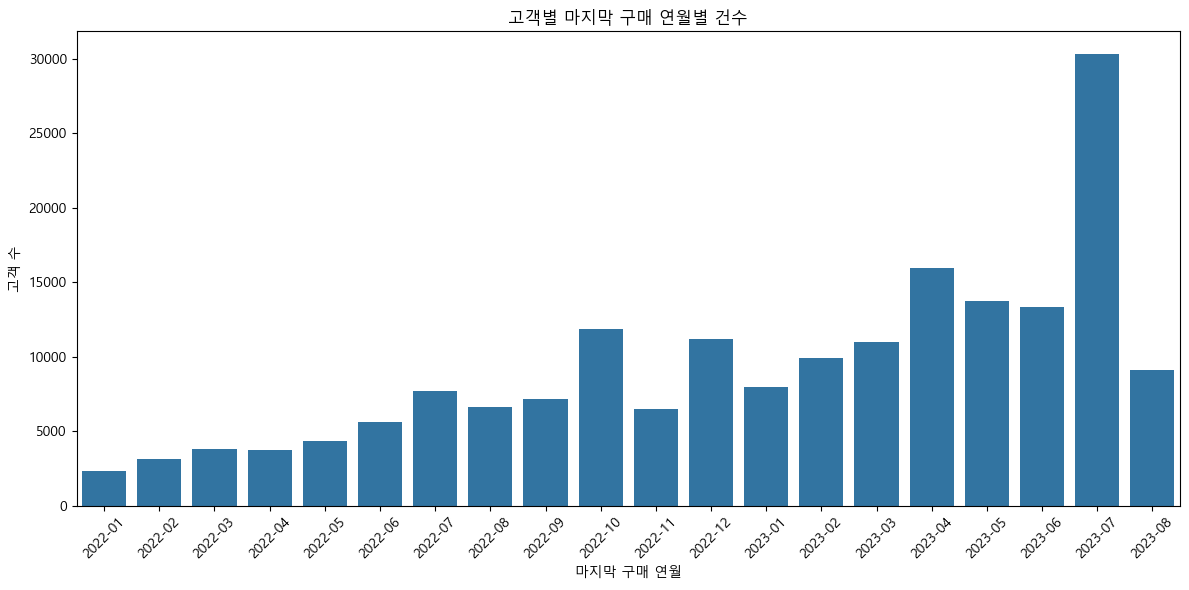

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) 'YYYY-MM' 형식의 연월 컬럼 생성
df['구매연월'] = df['마지막구매일'].dt.to_period('M')  # -> PeriodDtype('2025-06', …)

# 2) 순서를 위한 연월 리스트 (Period 객체는 sort 가능)
order = sorted(df['구매연월'].unique())

plt.figure(figsize=(12, 6))
sns.countplot(
    x='구매연월',
    data=df,
    order=order
)
plt.xticks(rotation=45)
plt.xlabel('마지막 구매 연월')
plt.ylabel('고객 수')
plt.title('고객별 마지막 구매 연월별 건수')
plt.tight_layout()
plt.show()

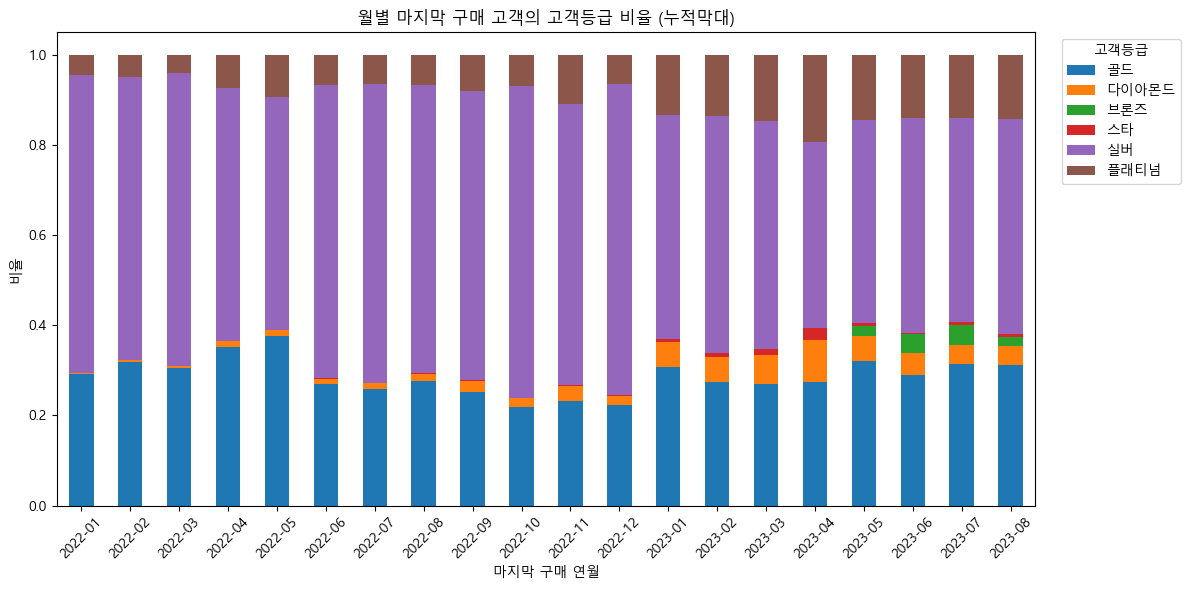

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 고객별 마지막 구매일과 곡객등급급 추출
cust_last = (
    df
    .groupby('고객번호')
    .agg({
        '구매일': 'max',        # 마지막 구매일
        '고객등급': 'first'     # 고객당 곡객등급급은 하나이므로 첫 값을 사용
    })
    .reset_index()
)

# 2) 'YYYY-MM' 형식의 연월 컬럼 생성
cust_last['구매연월'] = cust_last['구매일'].dt.to_period('M')

# 3) 월별·곡객등급급별 고객 수 집계
counts = (
    cust_last
    .groupby(['구매연월', '고객등급'])
    .size()
    .unstack(fill_value=0)
)

# 4) 월별 비율로 변환
props = counts.div(counts.sum(axis=1), axis=0)

# 5) 누적비율 막대그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
props.plot(
    kind='bar',
    stacked=True,
    ax=ax
)

# 6) 그래프 꾸미기
ax.set_xlabel('마지막 구매 연월')
ax.set_ylabel('비율')
ax.set_title('월별 마지막 구매 고객의 고객등급 비율 (누적막대)')
ax.legend(title='고객등급', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [274]:
df.columns

Index(['주문번호', '배송완료일', '배송시작일', '구매일', '구매시월령', '고객번호', '구매금액', '결제금액',
       '물품대분류', '상품명', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부',
       '물품판매량', '제품단가', '주문일로부터배송완료시간', '택배이동기간', '기저귀단계', '남아여아공용', '브랜드',
       '원플원', '핫딜', '아이정보건너뛰기', '구매시월령_bin', '상품명_정제', '총주문횟수', '마지막구매일',
       '고객휴면일수', '최근3개월구매금액', '고객등급', '등급별혜택_상품쿠폰', '등급별혜택_쇼핑지원금',
       '등급별혜택_무료배송쿠폰', '이탈등급', '마지막구매일_date', '구매연월'],
      dtype='object')

# '당일출고 서비스 전후로 달라진 점 -> 이탈 고객 중심 (통계적 유의)
- 22년 5월 24일부터 24시 이전 결제 완료 시 당일출고 서비스 시작
- 공지사항에 택배 없는 날, 공휴일에 따른 택배 지연
- 공휴일을 배송소요기간과 연결해야 할 듯
- 우리 데이터 : 2022-01-01 ~ 2023-08-08

In [233]:
로켓배송 = '2022-05-23'
df['당일출고서비스유무'] = np.where(df['구매일'] <= 로켓배송, '당일출고 서비스 시작 전', '당일출고 서비스 시작 후')

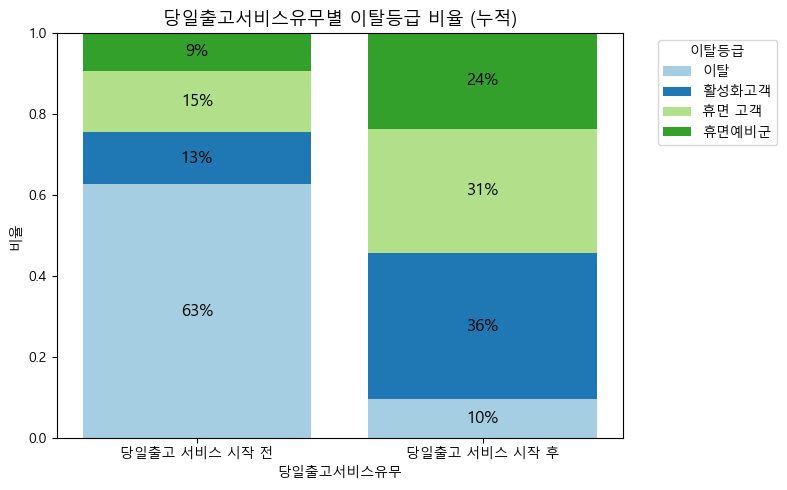

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 당일출고서비스유무별 이탈등급 비율 계산 (pivot 구조로)
ratio_df = (
    df.groupby('당일출고서비스유무')['이탈등급']
      .value_counts(normalize=True)
      .rename('비율')
      .reset_index()
      .pivot(index='당일출고서비스유무', columns='이탈등급', values='비율')
      .fillna(0)
)

# 2. 누적 막대 시각화
plt.figure(figsize=(8, 5))
bottom = pd.Series(0, index=ratio_df.index)
colors = plt.cm.Paired.colors  # 예쁜 팔레트

for i, col in enumerate(ratio_df.columns):
    plt.bar(ratio_df.index, ratio_df[col], bottom=bottom, label=col, color=colors[i % len(colors)])
    # 3. 막대 내부에 퍼센트 텍스트 표시
    for idx in ratio_df.index:
        h = ratio_df.loc[idx, col]
        if h > 0.03:  # 3% 이상인 경우에만
            plt.text(idx, bottom[idx] + h/2, f"{h:.0%}", ha='center', va='center', fontsize=12)
    bottom += ratio_df[col]

# 4. 스타일 마무리
plt.title('당일출고서비스유무별 이탈등급 비율 (누적)', fontsize=13)
plt.xlabel('당일출고서비스유무')
plt.ylabel('비율')
plt.ylim(0, 1)
plt.legend(title='이탈등급', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [235]:
# 브랜드 <-> 이탈등급 유의
tab = pd.crosstab(df['이탈등급'], df['당일출고서비스유무'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tab, correction=True)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p:.3f}")
print(f"degrees of freedom = {dof}")

# 기대 빈도도 확인해 보기
expected_df = pd.DataFrame(expected, index=tab.index, columns=tab.columns)
print("\nExpected frequencies:")
print(expected_df)

χ² = 47989.21
p-value = 0.000
degrees of freedom = 3

Expected frequencies:
당일출고서비스유무  당일출고 서비스 시작 전  당일출고 서비스 시작 후
이탈등급                                   
이탈           5481.464624   28292.535376
활성화고객        9720.697642   50173.302358
휴면 고객        8503.297685   43889.702315
휴면예비군        6376.540049   32912.459951


# 구매기록 없는 이탈고객 정보 -> 쓸 거 없음

In [228]:
df_member = pd.read_excel(
    './kids_data/Member_data.xlsx',
    dtype={
        '고객번호': str,
        '성별': str,
        '결혼유무': str,
        '거주지역': str,
        '연령': float,   # 연령도 혹시 결측이 있으면 float로
        '결제등록카드': str,
        '유입경로': str,
        '자녀여부': str
    })

In [229]:
# 1) 타입 맞추기 & 공백 제거
df_member['고객번호'] = df_member['고객번호'].astype(str).str.strip()
df['고객번호']        = df['고객번호'].astype(str).str.strip()

# 2) isin 필터
missing = df_member[~df_member['고객번호'].isin(df['고객번호'].unique())]

# # 3) (대안) merge + indicator
# tmp = df_member.merge(
#     df[['고객번호']],
#     on='고객번호',
#     how='left',
#     indicator=True
# )
# missing2 = tmp[tmp['_merge']=='left_only'].drop(columns=['_merge'])


In [230]:
missing.dropna()

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes
12,201812310749817,여,기혼,경남,31.0,BC카드,인스타그램,Yes
49,201812310749918,여,기혼,강원,31.0,기업은행,네이버블로그,Yes
53,201812310749931,여,기혼,경북,36.0,농협회원조합,네이버카페,Yes
61,201812310749950,여,기혼,경기,30.0,우리은행,인스타그램,Yes
...,...,...,...,...,...,...,...,...
81014,201912281057858,여,기혼,경기,37.0,국민은행,인스타그램,Yes
81026,201912281057901,여,기혼,경북,32.0,롯데카드,네이버블로그,Yes
81042,201912281057976,여,기혼,부산,27.0,롯데카드,지인추천,Yes
81072,201912291058075,여,기혼,경기,34.0,신한카드,페이스북,Yes


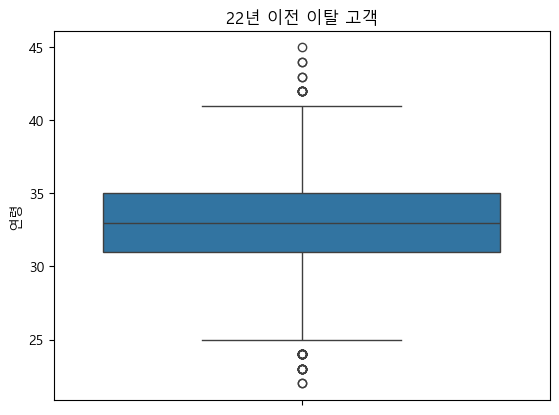

In [231]:
import seaborn as sns
sns.boxplot(missing['연령'])
plt.title('22년 이전 이탈 고객')
plt.show()

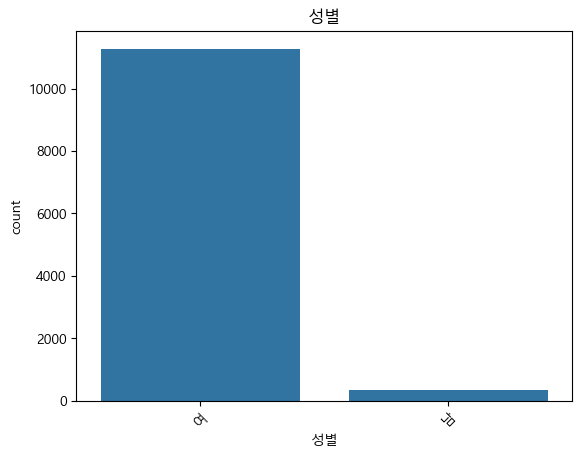

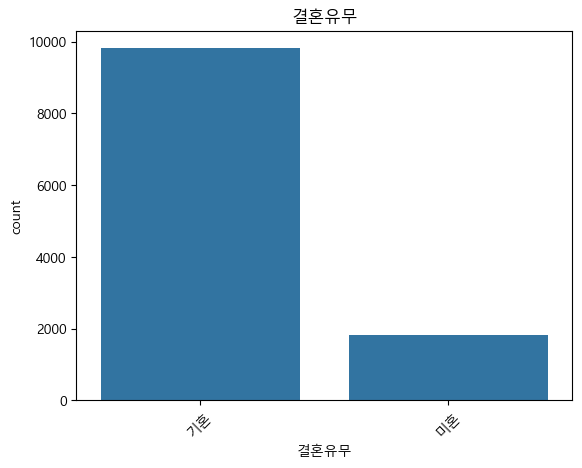

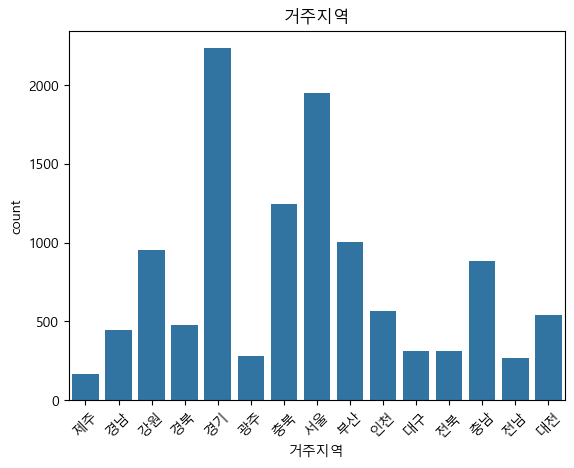

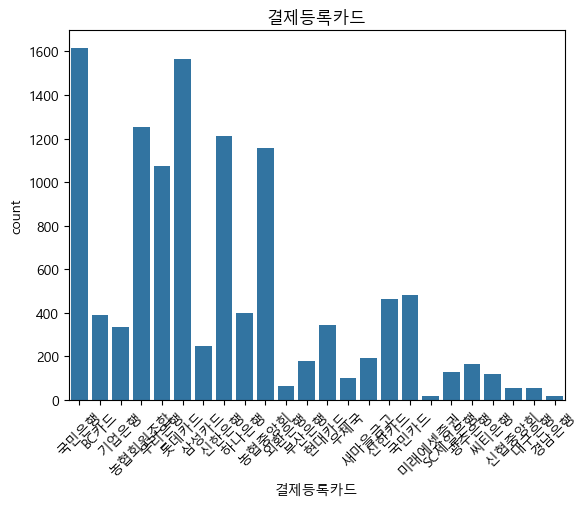

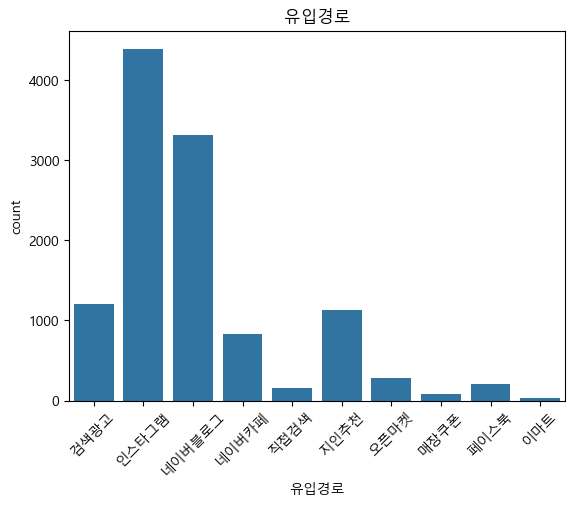

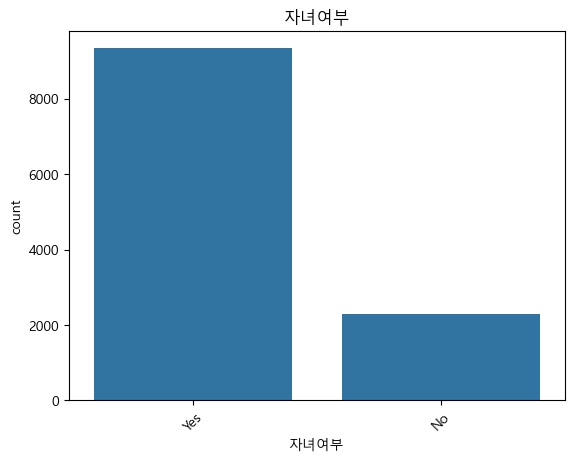

In [232]:
import seaborn as sns
cat_col = '성별	결혼유무	거주지역	결제등록카드	유입경로	자녀여부'.split()
for col in cat_col:
    plt.title(col)
    sns.countplot(data=missing, x=col)
    plt.xticks(rotation=45)
    plt.show()